1. **Введение**

2. **Загрузка и первичный осмотрм**
    - Загрузка необходимых библиотек (pandas, matplotlib, seaborn и т.д.)
    - Первичное изучение данных
    - Промежуточные выводы

3. **Предобработка:**
    - При необходимости написать функции, которые будут использоваться
    - Изучите типы данных в столбцах, при необходимости измените их. Напишите почему изменили тип данных.
    - Привести данные всех столбцов к нижнему регистру (все датасеты)
    - Проверить данные на явные дубликаты (при их наличии изучить их и устранить)
    - Проверьте столбцы на пропуски и обработайте их при необходимости (все датасеты)
    - Напишите возможне варианты, чем были вызваны пропуски (все датасеты)
    - Объеденить данные датасета ad_costs и user_source
    - Промежуточные вывод

4. **Анализ данных:**
    - Посчитать какой канал привел больше новых пользователей суммарно и построить гистограмму
    - Посчитать по каналам суммарые расходы и построить гистограмму
    - Узнать среднюю, медианную, минимальную и максимальную стоимость пользователя в разюивке по каналам.
    - Построить график изменения средней цены пользователя по каналам с течением времени до 2020-05-10
    - Посчитать количество разных построек созданные игроками и построить гистограмму
    - Посчитать общее количество построек по каналам. (гистограмма)
    - Посчитать LTV, CAC и ROI, взяв за суммарные затраты на рекламу cost, а за прибыль количество в опредленные день построенных зданий (так как после постройки здания пользователю показывается реклама)
    - Рассчитать конверсию пришедших пользователей с течением времени (график)
    - Расчитать конверсию пришедших пользователей с течением времени с разделением стратегии на PVP и PVE (чтобы понять, что больше удерживает (какой стиль игры) пользователей в игре)
    - Построить график по каналам отношения суммарного количества пользователей и суммарных затрат, построить гистограмму
    - Построить гистограмму отношения CAC по каналам и количества построек по каналам на игрока (это и есть ранжировка цена/качество)
    - Гипотеза 1:
        - Рабочая гипотеза: время завершения уровня различается в зависимости способа прохождения
        - В качестве стат. теста выбираем t-тест, сравнивать будем среднее время прохождения уровня разными способами
        - Н0: Среднее время завершения уровня через реализацию проекта и через победу над первым игроком равны, следовательно зависимости нет
        - Н1: Среднее время завершения уровня через реализацию проекта и через победу над первым игроком не равны, следовательно зависимости есть
        - после проведения стат. теста, который скажет отвергаем или принимаем мы нулевую гипотезу, в случае отвержения нулевой гипотезы, мы выведем оба значения среднего времени и посчитаем их разницу, таким образом покажем какой способ быстрее и насколько отличается.
        - На основе вывода о среднем времени делаем вывод о различиях времени завершения в зависимости от способа прохождения
    - Гипотеза 2:
        - Рабочая гипотеза: Есть ли зависимость вероятности прохождения уровня от канала
        - В качестве стат. теста выбираем z-тест, сравнивать будем доли игроков завершивших первый уровень по каналам
        - Н0:  Доля игроков завершивших уровень первого канала равна доли игроков второго канала, следовательно зависимости нет
        - Н1: Доля игроков завершивших уровень первого канала не равна доли игроков второго канала, следовательно зависимость есть
        - На основе вывода о долях делам вывод о наличии зависимости
    - Промежуточные выводы

5. **Ответы на вопросы заказчика**
    - Написать как выглядит показатели LTV, CAC и ROI
    - Написать как каналы ранжируются по суммарным расходам и средним расходам на пользователя
    - Написать пользователи с какого канала чаще проходят 1 уровень, дольше играют и больше строят.

6. **Выводы**


### Введение

В этом проекте я рассматриваю расходы на привлечение пользователей в игру "Космические братья". Главным образом мне необходимо ранжировать каналы привлечение по качеству привлечения (то есть ранжировать по критерию цена/качество). Также необходимо выявить возможные доходы компании при просмотре рекламы (так как монетезация игры только планируется).

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:
 - Победа над первым врагом
 - Реализация проекта - разработка орбитальной сборки спутников
В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

#### Загрузка необходимых данных и датасетов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import datetime as dt
import numpy as np
import plotly.express as px 
from datetime import datetime, timedelta
from scipy import stats as st
from statsmodels. stats.weightstats import ztest as ztest

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')
costs = pd.read_csv('/datasets/ad_costs.csv')
user = pd.read_csv('/datasets/user_source.csv')

#### Первичное изучение данных

In [3]:
# Это функция которая позволяет первончально познакомиться с датасетом
def inform(data):
    inf = data.info() #вывод общей информации по датасету
    print(inf)
    null = data.isnull().sum() #вывод информации по общему количеству пропусков в датасете
    print()
    print(null)
    duple = data.duplicated().sum() #вывод количества явных дубликатов в датасете
    print()
    print(f'Количество явных дубликатов: {duple}')
    head_5 = data.head(5)
    print()
    print(head_5)
    return

In [4]:
print(inform(user))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
None

user_id    0
source     0
dtype: int64

Количество явных дубликатов: 0

                                user_id                   source
0  0001f83c-c6ac-4621-b7f0-8a28b283ac30             facebook_ads
1  00151b4f-ba38-44a8-a650-d7cf130a0105            yandex_direct
2  001aaea6-3d14-43f1-8ca8-7f48820f17aa  youtube_channel_reklama
3  001d39dc-366c-4021-9604-6a3b9ff01e25    instagram_new_adverts
4  002f508f-67b6-479f-814b-b05f00d4e995             facebook_ads
None


In [5]:
print(inform(costs))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None

source    0
day       0
cost      0
dtype: int64

Количество явных дубликатов: 0

         source         day        cost
0  facebook_ads  2020-05-03  935.882786
1  facebook_ads  2020-05-04  548.354480
2  facebook_ads  2020-05-05  260.185754
3  facebook_ads  2020-05-06  177.982200
4  facebook_ads  2020-05-07  111.766796
None


In [6]:
print(inform(game_actions))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
None

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

Количество явных дубликатов: 1

        event_datetime     event  building_type  \
0  2020-05-04 00:00:01  building  assembly_shop   
1  2020-05-04 00:00:03  building  assembly_shop   
2  2020-05-04 00:00:16  building  assembly_shop   
3  2020-05-04 00:00:16  building  assembly_shop   
4  2020-05-04 00:00:35  building  assembly_shop   

                                user_id project_typ

#### Промежуточный вывод

В этом блоке мы загрузили необходимые библиотеки и датасеты. Ознакомились первончальным образом с датасетами, выявили что датасете game_actions имеется один явный дубликат, надо рассмотреть его подрбонее, после чего возможно удалить. Также имеются пропуски в столбце project_type: 133774. И в столбце building_type 7683 пропусков. Также неоходимо перевеести тип данных столбца event_datetime в тип datatime.
В датасете costs необходимо перевести тип данных столбца day в datetime.


### Предобработка данных

In [7]:
# Приводим данные из датасетов к нижнему регистру
costs['source'] = costs['source'].str.lower()
game_actions['user_id'] = game_actions['user_id'].str.lower()
user['user_id'] = user['user_id'].str.lower()

In [8]:
# Меняем тип данных на правильный
game_actions['event_datetime'] = game_actions['event_datetime'].astype('datetime64[s]')
costs['day'] = pd.to_datetime(costs['day']).dt.date

In [9]:
# Удаляем единсвтеннцй дубликат в датасете
game_actions = game_actions.drop_duplicates()

Еще раз проверим датасет на пропуски данных, выделяем только один ивент - Building, чтобы удостоверится, что пропуски в этом столбце связаны только с изучением технологии.

In [10]:
build = game_actions.loc[(game_actions['event'] == 'building') & (game_actions['building_type'].isna())]
build

Empty DataFrame
Columns: [event_datetime, event, building_type, user_id, project_type]
Index: []

Проверяем датасет на пропуски данных, выделяем только один ивент - project, чтобы удостоверится, что пропуски в этом столбце связаны только со строительством.

In [11]:
project = game_actions.loc[(game_actions['event'] == 'project') & (game_actions['project_type'].isna())]
project

Empty DataFrame
Columns: [event_datetime, event, building_type, user_id, project_type]
Index: []

Для удобства дальнейше работы ыло решено создать ополнительный столбец game_type, где будет прописана стратегия игры каждого игрока: PVE или PVP.

PVE -  эту стратегию используют те игроки, которые смогли изучить технологию, а к PVP относятся все остальные игроки

In [12]:
pve = game_actions.loc[game_actions['project_type'] == 'satellite_orbital_assembly']
pve.insert(loc=5, column='game_type', value='PVE')
pve = pve.drop(['event_datetime', 'event', 'building_type', 'project_type'], axis=1)

game = game_actions.merge(pve, on='user_id', how='left') 
game['game_type'] = game['game_type'].fillna('PVP')

Так же было принято решение создать столбец finish_or_not, для удобства дальнейшей работы. В этом столбце данные о каждом ироке закончил он игру или нет, это опредлеяется по столбцу event, где прописано finished_stage_1

In [13]:
finish = game_actions.loc[game_actions['event'] == 'finished_stage_1']
finish.insert(loc=5, column='finish_or_not', value='finish')
finish = finish.drop(['event_datetime', 'event', 'building_type', 'project_type'], axis=1)

game = game.merge(finish, on='user_id', how='left') 
game['finish_or_not'] = game['finish_or_not'].fillna('not_finish')
game.head(10)

event_datetime     event  building_type  \
0 2020-05-04 00:00:01  building  assembly_shop   
1 2020-05-04 00:00:03  building  assembly_shop   
2 2020-05-04 00:00:16  building  assembly_shop   
3 2020-05-04 00:00:16  building  assembly_shop   
4 2020-05-04 00:00:35  building  assembly_shop   
5 2020-05-04 00:00:36  building  assembly_shop   
6 2020-05-04 00:00:36  building  assembly_shop   
7 2020-05-04 00:00:38  building  assembly_shop   
8 2020-05-04 00:00:44  building  assembly_shop   
9 2020-05-04 00:01:33  building  assembly_shop   

                                user_id project_type game_type finish_or_not  
0  55e92310-cb8e-4754-b622-597e124b03de          NaN       PVP    not_finish  
1  c07b1c10-f477-44dc-81dc-ec82254b1347          NaN       PVE        finish  
2  6edd42cc-e753-4ff6-a947-2107cd560710          NaN       PVP        finish  
3  92c69003-d60a-444a-827f-8cc51bf6bf4c          NaN       PVP    not_finish  
4  cdc6bb92-0ccb-4490-9866-ef142f09139d          NaN       PVP        finish  
5  06c592ca-902d-42bb-bac3-75ce84cca159          NaN       PVP    not_finish  
6  4fe0f101-694b-4e31-9740-d1d87f7208ea          NaN       PVP        finish  
7  beb8ca15-33a9-465d-b47b-89aa96f89c9a          NaN       PVP    not_finish  
8  65a92713-5969-48b1-8945-bfefa5063887          NaN       PVE        finish  
9  fa352362-d258-472c-b295-2796ccc39fa3          NaN       PVE        finish

In [14]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
 5   game_type       135639 non-null  object        
 6   finish_or_not   135639 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 8.3+ MB


In [15]:
alle = game['user_id'].nunique()
user_f = game.loc[game['finish_or_not'] == 'not_finish']['user_id'].nunique()
user_nf = game.loc[game['finish_or_not'] == 'finish']['user_id'].nunique()
user_pvp = game.loc[game['game_type'] == 'PVP']['user_id'].nunique()
user_pve =game.loc[game['game_type'] == 'PVE']['user_id'].nunique()

print(f'Всего уникальных пользователей: {alle}') 
print(f'Пользователей завершивших игру: {user_f}')
print(f'Пользователей не завершивших игру: {user_nf}')
print(f'Пользователей выбравших стратегию PVP: {user_pvp}')
print(f'Пользователей выбравших стратегию PVE: {user_pve}')

Всего уникальных пользователей: 13576
Пользователей завершивших игру: 7759
Пользователей не завершивших игру: 5817
Пользователей выбравших стратегию PVP: 11710
Пользователей выбравших стратегию PVE: 1866


In [16]:
costs_user = costs.merge(user, on='source', how='left') 
costs_user.head(5)

source         day        cost                               user_id
0  facebook_ads  2020-05-03  935.882786  0001f83c-c6ac-4621-b7f0-8a28b283ac30
1  facebook_ads  2020-05-03  935.882786  002f508f-67b6-479f-814b-b05f00d4e995
2  facebook_ads  2020-05-03  935.882786  004074f8-251a-4776-922c-8348dca1a2f6
3  facebook_ads  2020-05-03  935.882786  00440efd-aa50-4b4b-aae8-ffcd1782729d
4  facebook_ads  2020-05-03  935.882786  00965328-5e54-453f-b11b-52f8ae9ae80b

#### Промежуточный вывод

В блоке предобработки данных было проработано несколько пунктов:
1. Данные были приведены к нижнему регистру
2. В двух столбцах поменян тип данных на datetime
3. Удалены явные дубликаты
4. Еще раз проверены данные на пропуски в столбцах building_type b project_type. В данных столбцах зависимые друг от друга пропуски. В столбце event указывается время событие и в это время может быть построено здание, тогда в столбце исследований ничего не будет. И наоборот произошло событие завершение исследования, тогда в столбце исследований пропишется какое исследование, но в столбце построе будет пропуск, потому что ничего не было построено. Поэтому эти пропуски изменяться не будут и я их отсавил так как они есть. Проверил есть ли пропсуки не зависищие от этого. оказалось нет.
5. Было создано два дополнительных столбца game_type и finish_or_not, для дальнейшего удобства работы. В первом столбце показывается какую стратегию выбрал пользователь PVE или PVP. Во втором показывается завершил ли игрок уровень до конца теста или нет. После чего мы проверили общее количество пользователей и по разделению на стратегию и завершению. Данные сошлись, так что созданные столбцы принимаются в работу.
6. Были объеденены датасеты costs и user для удобства работы.

### Анализ данных

- Посчитать какой канал привел больше новых пользователей суммарно и построить гистограмму
    - Посчитать по каналам суммарые расходы и построить гистограмму
    - Узнать среднюю, медианную, минимальную и максимальную стоимость пользователя в разюивке по каналам.
    - Построить график изменения средней цены пользователя по каналам с течением времени до 2020-05-10
    - Посчитать количество разных построек созданные игроками и построить гистограмму
    - Посчитать медианное количество построек по каналам. (гистограмма)
    - Посчитать LTV, CAC и ROI, взяв за суммарные затраты на рекламу cost, а за прибыль количество в опредленные день построенных зданий (так как после постройки здания пользователю показывается реклама)
    - Рассчитать конверсию пришедших пользователей с течением времени (график)
    - Расчитать конверсию пришедших пользователей с течением времени с разделением стратегии на PVP и PVE (чтобы понять, что больше удерживает (какой стиль игры) пользователей в игре)
    - Построить график по каналам отношения суммарного количества пользователей и суммарных затрат, построить гистограмму
    - Построить гистограмму отношения CAC по каналам и количества построек по каналам на игрока (это и есть ранжировка цена/качество)

#### Какой канал привел больше пользователей

In [17]:
top_source = user.pivot_table(index='source', values='user_id', aggfunc='count').reset_index().sort_values(by='user_id', \
                                                                                                           ascending=False)
top_source

source  user_id
2            yandex_direct     4817
1    instagram_new_adverts     3347
0             facebook_ads     2726
3  youtube_channel_reklama     2686

In [18]:
fig = px.bar(top_source, x='source', y='user_id')
fig.update_layout(title='Колиечство пользователей пришедших с разных ресурсов',\
                  xaxis_title='ресурсы', yaxis_title='количество пользователей')
fig.update_xaxes(tickangle=45)
fig.show()

##### Прмежуточный вывод

В суммарном количестве yandex_direct привел больше всего пользователей в игру - 4817, instagram_new_adverts - 3347, facebook_ads - 2726, и меньше всего пользователей привел ресурс yutube_channel_reklama - 2686

#### Суммарные затраты на привлечение пользователей по ресурсам

In [19]:
top_cost = costs.pivot_table(index='source', values='cost', aggfunc='sum').reset_index().sort_values(by='cost', \
                                                                                                           ascending=False)
top_cost

source         cost
2            yandex_direct  2233.111449
1    instagram_new_adverts  2161.441691
0             facebook_ads  2140.904643
3  youtube_channel_reklama  1068.119204

In [20]:
fig = px.bar(top_cost, x='source', y='cost')
fig.update_layout(title='Суммарное количество затрат на привлечение пользователей по ресурсам',\
                  xaxis_title='ресурсы', yaxis_title='Суммарне затраты')
fig.update_xaxes(tickangle=45)
fig.show()

##### Промежуточные выводы

В суммарном количестве больше всего средств на привлечение пользователей было потрачено на а ресурс yandex_direct - 2233,111, instagram_new_adverts - 2161,442, facebook_ads - 2140,905, и меньше всего средств было затрачено на канал yutube_channel_reklama - 1068,119.

#### Стоимости пользователя в разбивке по каналам

Для этого пункта нам необходимо построить спецальную таблицу, где будет отображаться средняя стоимость одного ползователя в опредленный день. У нас реклама началась 2020-05-09, следовательно игрок пришедший 2020-05-10 будет рассчитывать по стоимости 2020-05-09. У нас получается смещение на один день. За дату привлечение игрока мы считаем первый ивент игрока в игре.

In [21]:
start_day = game_actions.groupby('user_id')['event_datetime'].agg('min').reset_index() #tutu
start_day['event_datetime'] = pd.to_datetime(start_day['event_datetime']).dt.date #tutu
start_day = start_day.rename(columns={'event_datetime' : 'day'}) #tutu
start_day

user_id         day
0      0001f83c-c6ac-4621-b7f0-8a28b283ac30  2020-05-06
1      00151b4f-ba38-44a8-a650-d7cf130a0105  2020-05-06
2      001aaea6-3d14-43f1-8ca8-7f48820f17aa  2020-05-05
3      001d39dc-366c-4021-9604-6a3b9ff01e25  2020-05-05
4      002f508f-67b6-479f-814b-b05f00d4e995  2020-05-05
...                                     ...         ...
13571  ffef4fed-164c-40e1-bde1-3980f76d0fb5  2020-05-04
13572  fffab3da-da0e-4e30-ae62-10d0a2e24a4e  2020-05-04
13573  fffb626c-5ab6-47c9-8113-2062a2f18494  2020-05-04
13574  ffff194a-56b7-4c12-860d-3485242ae7f5  2020-05-04
13575  ffff69cc-fec1-4fd3-9f98-93be1112a6b8  2020-05-08

[13576 rows x 2 columns]

In [22]:
print(start_day['day'].max())
print(costs['day'].max())

2020-05-10
2020-05-09


Производим смещение на один день, чтобы расчитать среднюю стоимость игрока

In [23]:
show_day = start_day
show_day['day'] = show_day['day'] - timedelta(days=1)
show_day

user_id         day
0      0001f83c-c6ac-4621-b7f0-8a28b283ac30  2020-05-05
1      00151b4f-ba38-44a8-a650-d7cf130a0105  2020-05-05
2      001aaea6-3d14-43f1-8ca8-7f48820f17aa  2020-05-04
3      001d39dc-366c-4021-9604-6a3b9ff01e25  2020-05-04
4      002f508f-67b6-479f-814b-b05f00d4e995  2020-05-04
...                                     ...         ...
13571  ffef4fed-164c-40e1-bde1-3980f76d0fb5  2020-05-03
13572  fffab3da-da0e-4e30-ae62-10d0a2e24a4e  2020-05-03
13573  fffb626c-5ab6-47c9-8113-2062a2f18494  2020-05-03
13574  ffff194a-56b7-4c12-860d-3485242ae7f5  2020-05-03
13575  ffff69cc-fec1-4fd3-9f98-93be1112a6b8  2020-05-07

[13576 rows x 2 columns]

Далее объеденяем датасет с первым посещением игры уникальных пользователей с датасетом уникальных пользователей и ресурсов, с которых они пришли. После чего создаем новый столбец с названием ресурса и датой, он необходим для объединения с датасетом grou_costs, в котором есть сумма расходов на ресурсы, далее столбец для объединения будет удален. И в итоге мы получаем таблицу с расходами средств на ресурсы по дням, количество привлеченных пользователей в этот день и средней ценой пользователя по дням.

In [24]:
source_user = show_day.merge(user, on='user_id', how='left') 


source_count = source_user.groupby(['source', 'day'])['user_id'].agg('count').reset_index()
source_count['day'] = source_count['day'].astype('str') 
source_count['id'] = source_count['day'] + source_count['source'] 


group_costs = costs[['source', 'day', 'cost']]
group_costs['day'] = group_costs['day'].astype('str') 
group_costs['id'] = group_costs['day'] + group_costs['source']
group_costs = group_costs.drop(['source', 'day'], axis=1)


mean_user_costs = source_count.merge(group_costs, on = 'id', how='right')
mean_user_costs = mean_user_costs.drop(['id'], axis=1)
mean_user_costs['mean'] = mean_user_costs['cost'] / mean_user_costs['user_id']
mean_user_costs = mean_user_costs.rename(columns={'user_id' : 'users'})
mean_user_costs['day'] = pd.to_datetime(mean_user_costs['day']).dt.date
mean_user_costs

source         day  users        cost      mean
0              facebook_ads  2020-05-03   1184  935.882786  0.790442
1              facebook_ads  2020-05-04    694  548.354480  0.790136
2              facebook_ads  2020-05-05    345  260.185754  0.754162
3              facebook_ads  2020-05-06    224  177.982200  0.794563
4              facebook_ads  2020-05-07    139  111.766796  0.804078
5              facebook_ads  2020-05-08     84   68.009276  0.809634
6              facebook_ads  2020-05-09     56   38.723350  0.691488
7     instagram_new_adverts  2020-05-03   1452  943.204717  0.649590
8     instagram_new_adverts  2020-05-04    796  502.925451  0.631816
9     instagram_new_adverts  2020-05-05    472  313.970984  0.665193
10    instagram_new_adverts  2020-05-06    270  173.071145  0.641004
11    instagram_new_adverts  2020-05-07    175  109.915254  0.628087
12    instagram_new_adverts  2020-05-08    112   71.578739  0.639096
13    instagram_new_adverts  2020-05-09     70   46.775400  0.668220
14            yandex_direct  2020-05-03   2078  969.139394  0.466381
15            yandex_direct  2020-05-04   1208  554.651494  0.459149
16            yandex_direct  2020-05-05    664  308.232990  0.464206
17            yandex_direct  2020-05-06    395  180.917099  0.458018
18            yandex_direct  2020-05-07    239  114.429338  0.478784
19            yandex_direct  2020-05-08    144   62.961630  0.437234
20            yandex_direct  2020-05-09     89   42.779505  0.480669
21  youtube_channel_reklama  2020-05-03   1146  454.224943  0.396357
22  youtube_channel_reklama  2020-05-04    663  259.073224  0.390759
23  youtube_channel_reklama  2020-05-05    366  147.041741  0.401753
24  youtube_channel_reklama  2020-05-06    220   88.506074  0.402300
25  youtube_channel_reklama  2020-05-07    135   55.740645  0.412894
26  youtube_channel_reklama  2020-05-08    100   40.217907  0.402179
27  youtube_channel_reklama  2020-05-09     56   23.314669  0.416333

In [25]:
mean_user_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   users   28 non-null     int64  
 3   cost    28 non-null     float64
 4   mean    28 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [26]:
mean_cost = mean_user_costs.groupby(by='source')['mean'].agg({'mean', 'median', 'min', 'max'}).reset_index()
mean_cost = mean_cost.sort_values(by='mean', ascending=False)
mean_cost

source      mean       min       max    median
0             facebook_ads  0.776358  0.691488  0.809634  0.790442
1    instagram_new_adverts  0.646144  0.628087  0.668220  0.641004
2            yandex_direct  0.463491  0.437234  0.480669  0.464206
3  youtube_channel_reklama  0.403225  0.390759  0.416333  0.402179

In [27]:
fig = px.bar(mean_cost, x='source', y='mean')
fig.update_layout(title='Средняя стоимость пользователя', xaxis_title='ресурсы', yaxis_title='затраты на пользователя')
fig.update_xaxes(tickangle=45)
fig.show()

In [28]:
fig = px.bar(mean_cost, x='source', y='median')
fig.update_layout(title='Медианная стоимость пользователя', xaxis_title='ресурсы', yaxis_title='затраты на пользователя')
fig.update_xaxes(tickangle=45)
fig.show()

##### Промежучтоный вывод

Мы построили две гистограммы: среднюю и медианную стоимость пользователя. По расположению ресурсы не отличаются, в данном случае более показательной будет средняя стоимость. Самая высокая средняя стоимость пользователя на ресурсе facebook_ads - 0,7763576, затем идет instagram_new_adverts - 0.6461437, yandex_direct - 0.4634914, youtube_channel_reklama - 0.4032251

#### Построить график изменения средней цены пользователя по каналам с течением времени до 2020-05-10

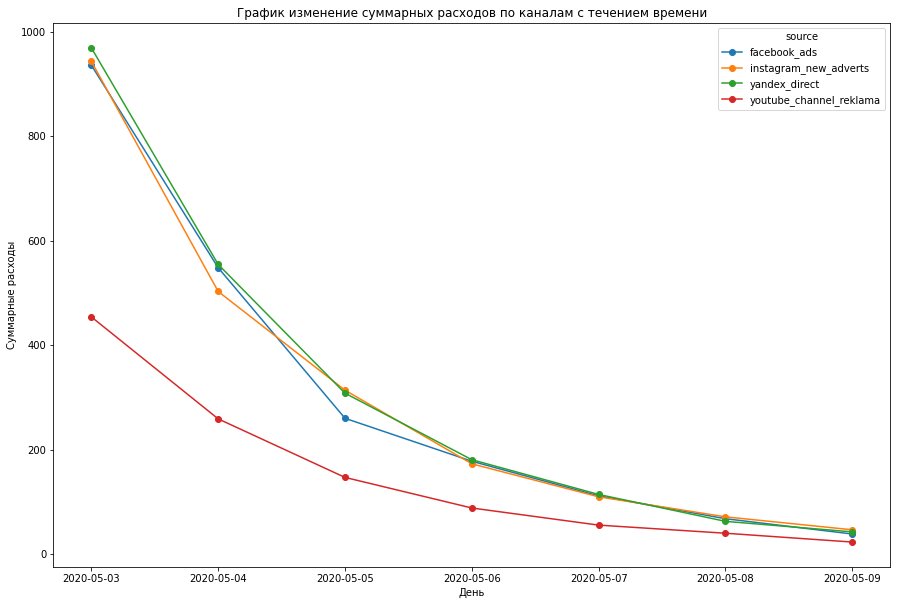

In [29]:
table_cost = costs.pivot_table(index='day', values = 'cost', columns = 'source')
table_cost.plot(marker = 'o', figsize=(15, 10))
plt.ylabel('Суммарные расходы')
plt.xlabel('День')
plt.title('График изменение суммарных расходов по каналам с течением времени')
plt.show();

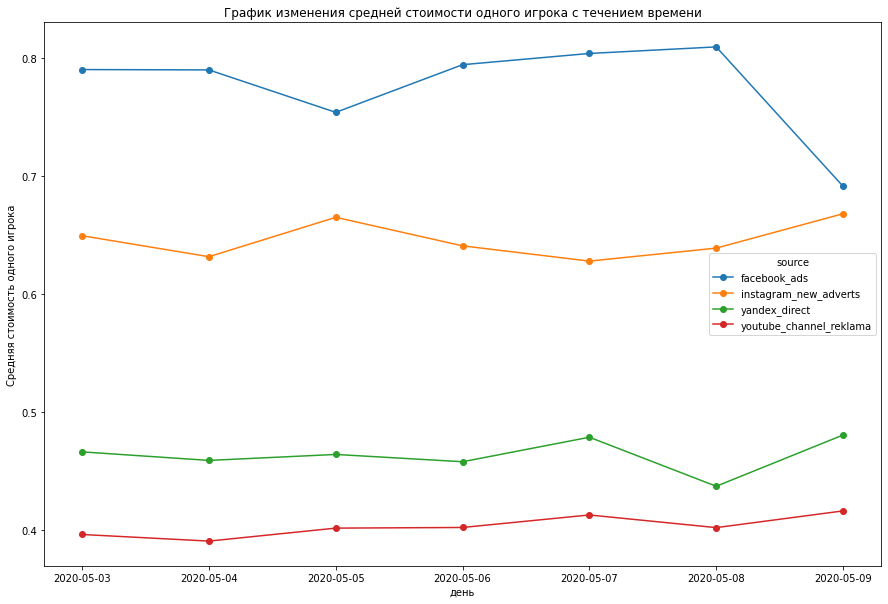

In [30]:
table_users_cost = mean_user_costs.pivot_table(index='day', values = 'mean', columns = 'source')
table_users_cost.plot(marker = 'o', figsize=(15, 10))
plt.ylabel('Средняя стоимость одного игрока')
plt.xlabel('день')
plt.title('График изменения средней стоимости одного игрока с течением времени')
plt.show();

##### Промежуточные выводы

На графике изменения суммарных расходов по каналам можно увидеть, что расходы на рекламу с течением врени на яндекс, инстаграмм и фейсбук приблизительно одинаковы, чего нельзя сказать о расходах на ютуб. На графике видно, что они стабильно меньше и 9 мая они максимально приближены к расходам по другим ресурсам.

На графике изменения средней стоимости игрока с течением времени мы видим что самые дорогие пользователи пришли с фейсбука, также наблюдаем незначительное падение стоимости 5 мая, после которого стоимость снова возрасла. И к 9 мая мы видим резкое уменьшение стоимости по этому ресурсу. У пользователей инстаграмма как и у всех остальных ресурсво наблюдается незначительный рост стоимости 9 мая. Так же виден рост 5 мая у пользователей с инстаграмма, но затем он сниается.
У пользователей яндекса стоимость достаточно стабильна о 7 мая, в этом день наблюдается незначительнй скачок вверх, затем 8 мая падение стоимости, и потом снова рост. У пользователей ютуба идет стабильный незначительный рост за все время.

#### Посчитать количество разных построек созданные игроками и построить гистограмму

In [31]:
building_count = game.groupby('building_type')['event'].count().reset_index().sort_values(by='event', ascending=False)
building_count

building_type  event
2        spaceport  59325
0    assembly_shop  54494
1  research_center  14137

In [32]:
fig = px.bar(building_count, x='building_type', y='event')
fig.update_layout(title='Суммарное количество различных построек созданных игроками', \
                  xaxis_title='Тип постройки', yaxis_title='Количество')
fig.update_xaxes(tickangle=45)
fig.show()

##### Промежуточные выводы

В игре возможно три типа зданий - spaceport, assembly_shop и research_centre. Самым популярным зданием для постройки оказалось spaceport - 59325, затем идет assembly_shop - 54494, и меньше всего строят research_centre - 14137. из этих данных можно предполодить, что чаще всего игроки предпочетают PVP стратегию, чем PVE

#### Посчитать общее количество построек по ресурсам

In [33]:
game_build_source = game_actions.merge(user, on='user_id', how='left')
game_build_source = game_build_source.query('event == "building"')
game_build_source

event_datetime     event    building_type  \
0      2020-05-04 00:00:01  building    assembly_shop   
1      2020-05-04 00:00:03  building    assembly_shop   
2      2020-05-04 00:00:16  building    assembly_shop   
3      2020-05-04 00:00:16  building    assembly_shop   
4      2020-05-04 00:00:35  building    assembly_shop   
...                    ...       ...              ...   
135626 2020-06-04 05:18:54  building  research_center   
135630 2020-06-04 13:26:25  building  research_center   
135633 2020-06-04 18:14:33  building  research_center   
135634 2020-06-05 00:08:06  building  research_center   
135636 2020-06-05 08:57:52  building  research_center   

                                     user_id project_type  \
0       55e92310-cb8e-4754-b622-597e124b03de          NaN   
1       c07b1c10-f477-44dc-81dc-ec82254b1347          NaN   
2       6edd42cc-e753-4ff6-a947-2107cd560710          NaN   
3       92c69003-d60a-444a-827f-8cc51bf6bf4c          NaN   
4       cdc6bb92-0ccb-4490-9866-ef142f09139d          NaN   
...                                      ...          ...   
135626  d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8          NaN   
135630  32572adb-900f-4b5d-a453-1eb1e6d88d8b          NaN   
135633  515c1952-99aa-4bca-a7ea-d0449eb5385a          NaN   
135634  f21d179f-1c4b-437e-b9c6-ab1976907195          NaN   
135636  ed3e7d02-8a96-4be7-9998-e9813ff9c316          NaN   

                         source  
0       youtube_channel_reklama  
1                  facebook_ads  
2         instagram_new_adverts  
3                  facebook_ads  
4                 yandex_direct  
...                         ...  
135626             facebook_ads  
135630             facebook_ads  
135633            yandex_direct  
135634    instagram_new_adverts  
135636  youtube_channel_reklama  

[127956 rows x 6 columns]

In [34]:
sum_build_source = game_build_source.groupby('source')['event'].count().reset_index().sort_values(by='event', ascending=False)

In [35]:
fig = px.bar(sum_build_source, x='source', y='event')
fig.update_layout(title='Общее количество построек по ресурсам', \
                  xaxis_title='Ресурс', yaxis_title='Количество')
fig.update_xaxes(tickangle=45)
fig.show()

##### Промежуточные выводы

Больше всего зданий построили пользователи пришедшие с ресурса Яндекс - 45032, затем идет Инстаграм - 31815, Фейсбук - 26131, и меньше всего зданий строят пользователи пришедшие с ресурса Ютуб - 24978

#### LTV, CAC и ROI

В данном расчете мы не будем считать полноценные LTV, CAC и ROI, будут рассчиватываться иха налоги, поскольку у нас нету монетезации игры. В нашем случае расходы на рекламу будут взяты из датасета costs, а за прибыль будет взято количество построенных зданий в опередленный день, поскольку при постройке зданий необходимо будет зайти в меню, где будет показываться реклама.

##### Общий LTV

In [43]:
def add_cost(data):
    if data == 'building':
        return 1
    else:
        return 0


game['revenue'] = game['event'].apply(add_cost)

In [44]:
game_source = pd.merge(game, user, on='user_id')
game_source = game_source.query('revenue > 0')

In [45]:
game_source['order_day'] = pd.to_datetime(game_source['event_datetime']).dt.date

In [46]:
first_order = game_source.groupby(['source', 'user_id']).agg({'order_day':'min'}).reset_index()
first_order = first_order.rename(columns={'order_day' : 'first_order'})

In [47]:
first_order_size = first_order.groupby(['source', 'first_order']).agg({'user_id':'count'}).reset_index()

In [48]:
orders = pd.merge(game_source, first_order, on=['user_id', 'source'])
cohort = orders.groupby(['source', 'first_order', 'order_day']).agg({'revenue':'sum'}).reset_index()
cohort = pd.merge(cohort, first_order_size,  on=['source', 'first_order'])

In [49]:
cohort['age'] = (cohort['order_day'] - cohort['first_order']) / timedelta(days=1)
cohort['age'] = cohort['age'].astype('int')

cohort['ltv'] = cohort['revenue'] / cohort['user_id']

cohort['order_day'] = pd.to_datetime(cohort['order_day']).dt.date
cohort['first_order'] = pd.to_datetime(cohort['first_order']).dt.date

cohort

source first_order   order_day  revenue  user_id  age  \
0               facebook_ads  2020-05-04  2020-05-04     1657     1184    0   
1               facebook_ads  2020-05-04  2020-05-05      873     1184    1   
2               facebook_ads  2020-05-04  2020-05-06      991     1184    2   
3               facebook_ads  2020-05-04  2020-05-07     1032     1184    3   
4               facebook_ads  2020-05-04  2020-05-08     1188     1184    4   
..                       ...         ...         ...      ...      ...  ...   
686  youtube_channel_reklama  2020-05-10  2020-05-24        5       56   14   
687  youtube_channel_reklama  2020-05-10  2020-05-25        5       56   15   
688  youtube_channel_reklama  2020-05-10  2020-05-26        2       56   16   
689  youtube_channel_reklama  2020-05-10  2020-05-29        1       56   19   
690  youtube_channel_reklama  2020-05-10  2020-05-30        1       56   20   

          ltv  
0    1.399493  
1    0.737331  
2    0.836993  
3    0.871622  
4    1.003378  
..        ...  
686  0.089286  
687  0.089286  
688  0.035714  
689  0.017857  
690  0.017857  

[691 rows x 7 columns]

In [50]:
ltv_table = cohort.pivot_table(index='first_order', columns='age', values='ltv', aggfunc='mean').round(3)

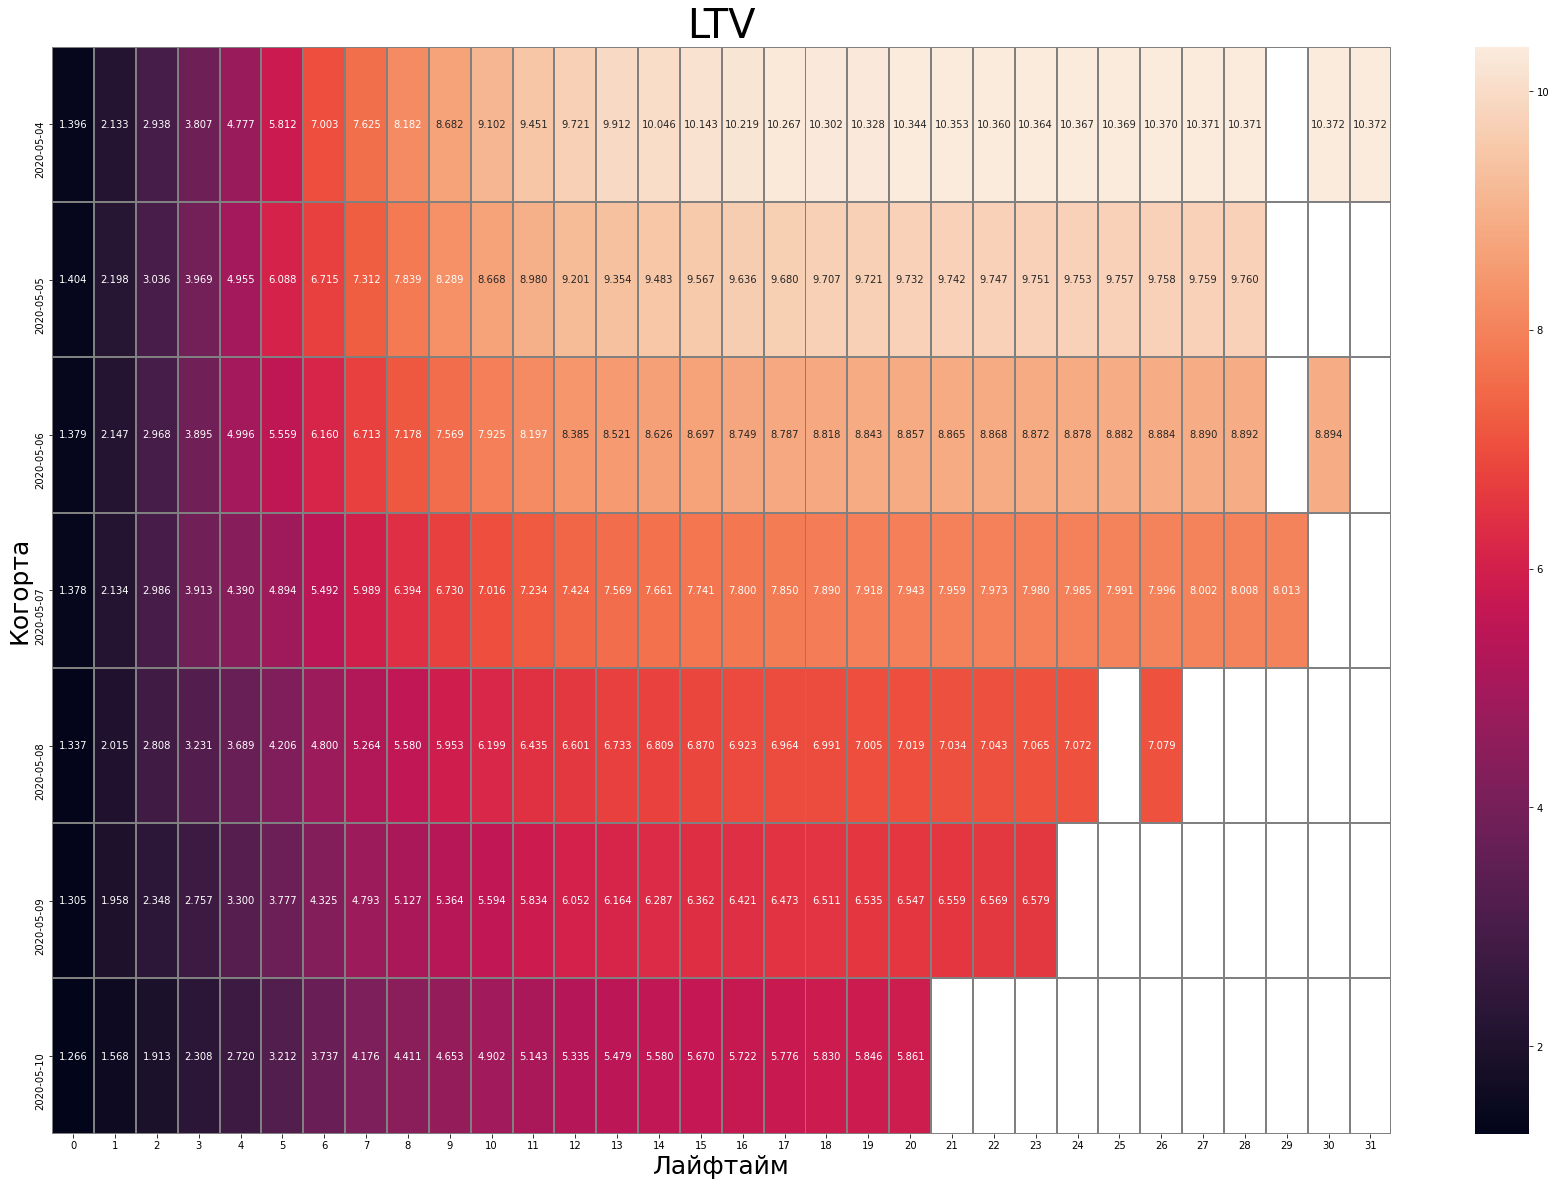

In [51]:
plt.figure(figsize=(30, 20))
plt.title('LTV', size=40)
ax = sns.heatmap(ltv_table.cumsum(axis=1), annot=True, fmt='.3f', linewidths=1, linecolor='grey')
plt.xlabel('Лайфтайм', size=25)
plt.ylabel('Когорта', size=25)
plt.show()

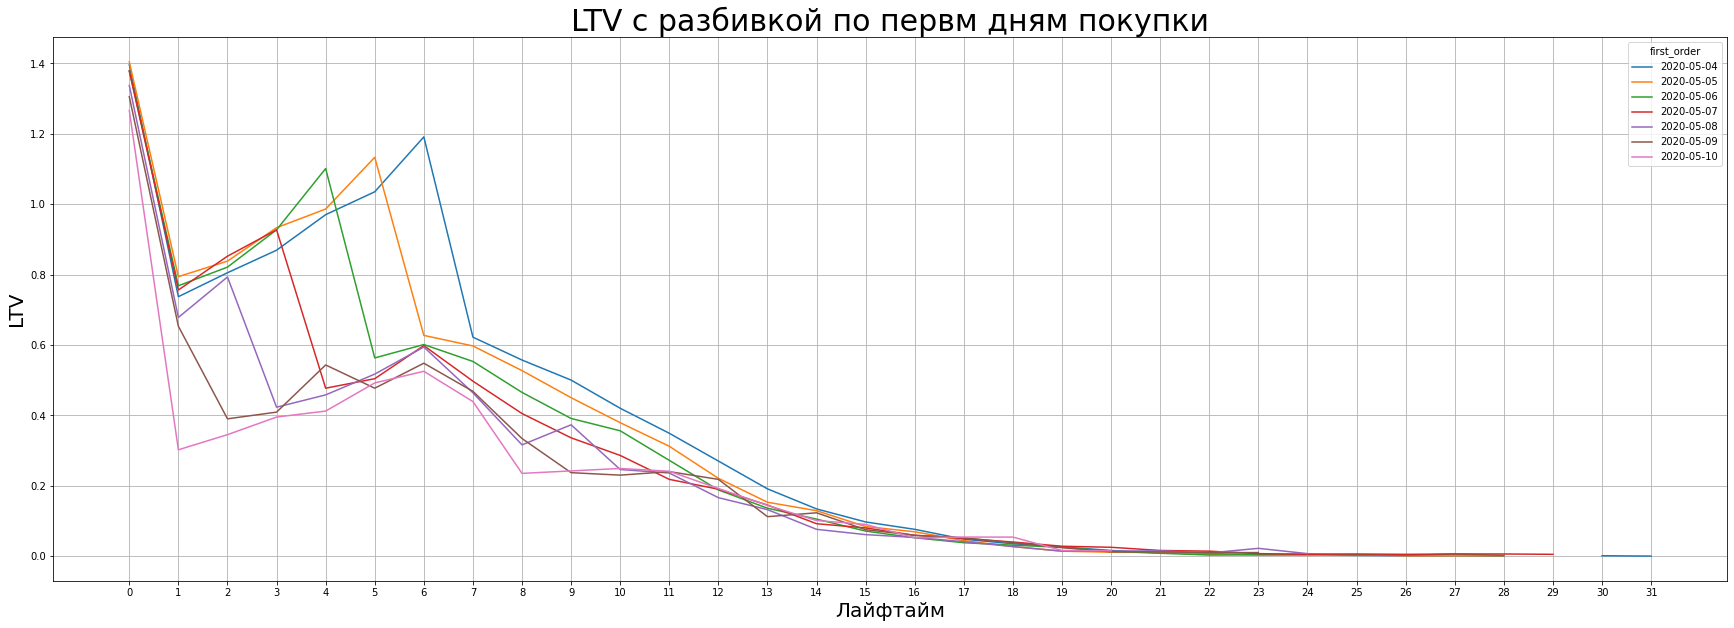

In [52]:
ltv_table.T.plot(grid=True, figsize=(30, 10), xticks=list(ltv_table.columns.values))
plt.title('LTV с разбивкой по первм дням покупки', size=30)
plt.ylabel('LTV', size=20)
plt.xlabel('Лайфтайм', size=20)
plt.show()

##### Промежуточные выводы

В общем анализе LTV видно, что 2020-05-10 был скачек в положительную сторону у всех каналов и во всех когортах, самый значительный скачок был 2020-05-04, 2020-05-05, 2020-05-06, 2020-05-07 и 2020-05-08. Также на хитмепе мы можем видеть, что в какие-то дни игроки просто не играли, возможно они утратили интерес или прошли уровень, после чего перестали играть. В первые 6 дней лайфтайма в каждой когорте мы наблюдаем значительный прирост LTV на хитмепе. В последние дни лайфтайма когорты LTV прибавляется на 0,01-0,02. Следует проанализировать LTV по ресурсам.

#####  LTV в раздбивке по ресурсам

In [53]:
def heat_map(data, source):
    ltv_source = data.pivot_table(index='first_order', columns='age', values='ltv', aggfunc='mean').round(3)
    
    print(source)
    plt.figure(figsize=(30, 20))
    plt.title('LTV', size=40)
    ax = sns.heatmap(ltv_source.cumsum(axis=1), annot=True, fmt='.3f', linewidths=1, linecolor='grey')
    plt.xlabel('Лайфтайм', size=25)
    plt.ylabel('Когорта', size=25)
    plt.show()
    
    ltv_source.T.plot(grid=True, figsize=(30, 10), xticks=list(ltv_source.columns.values))
    plt.title('LTV с разбивкой по первм дням покупки', size=30)
    plt.ylabel('LTV', size=20)
    plt.xlabel('Лайфтайм', size=20)
    plt.show()

facebook_ads


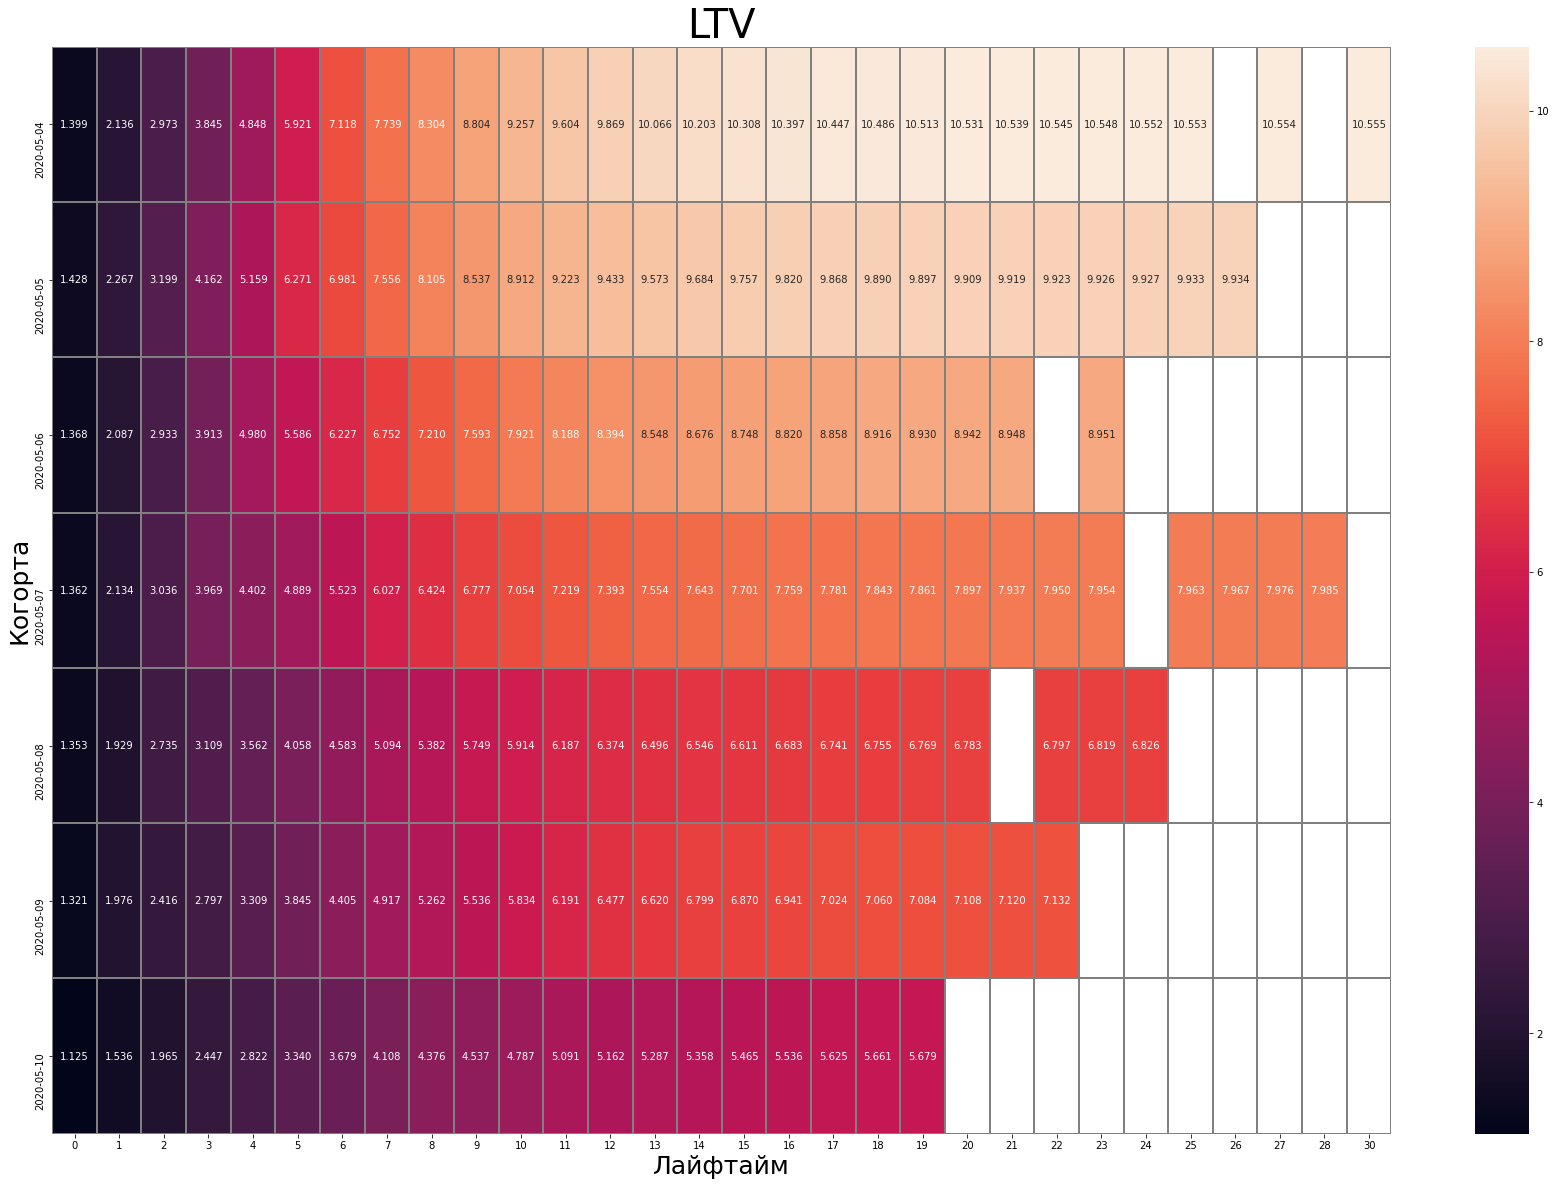

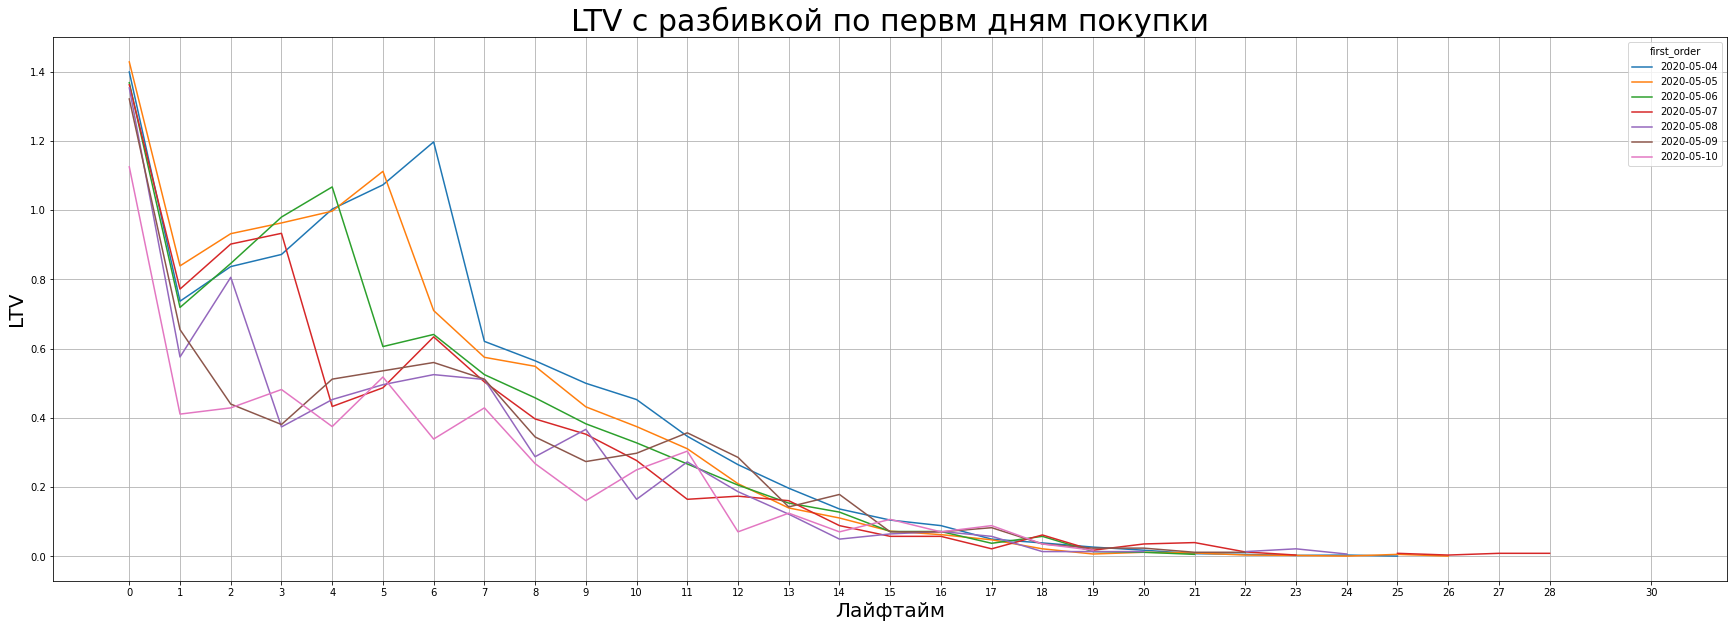

instagram_new_adverts


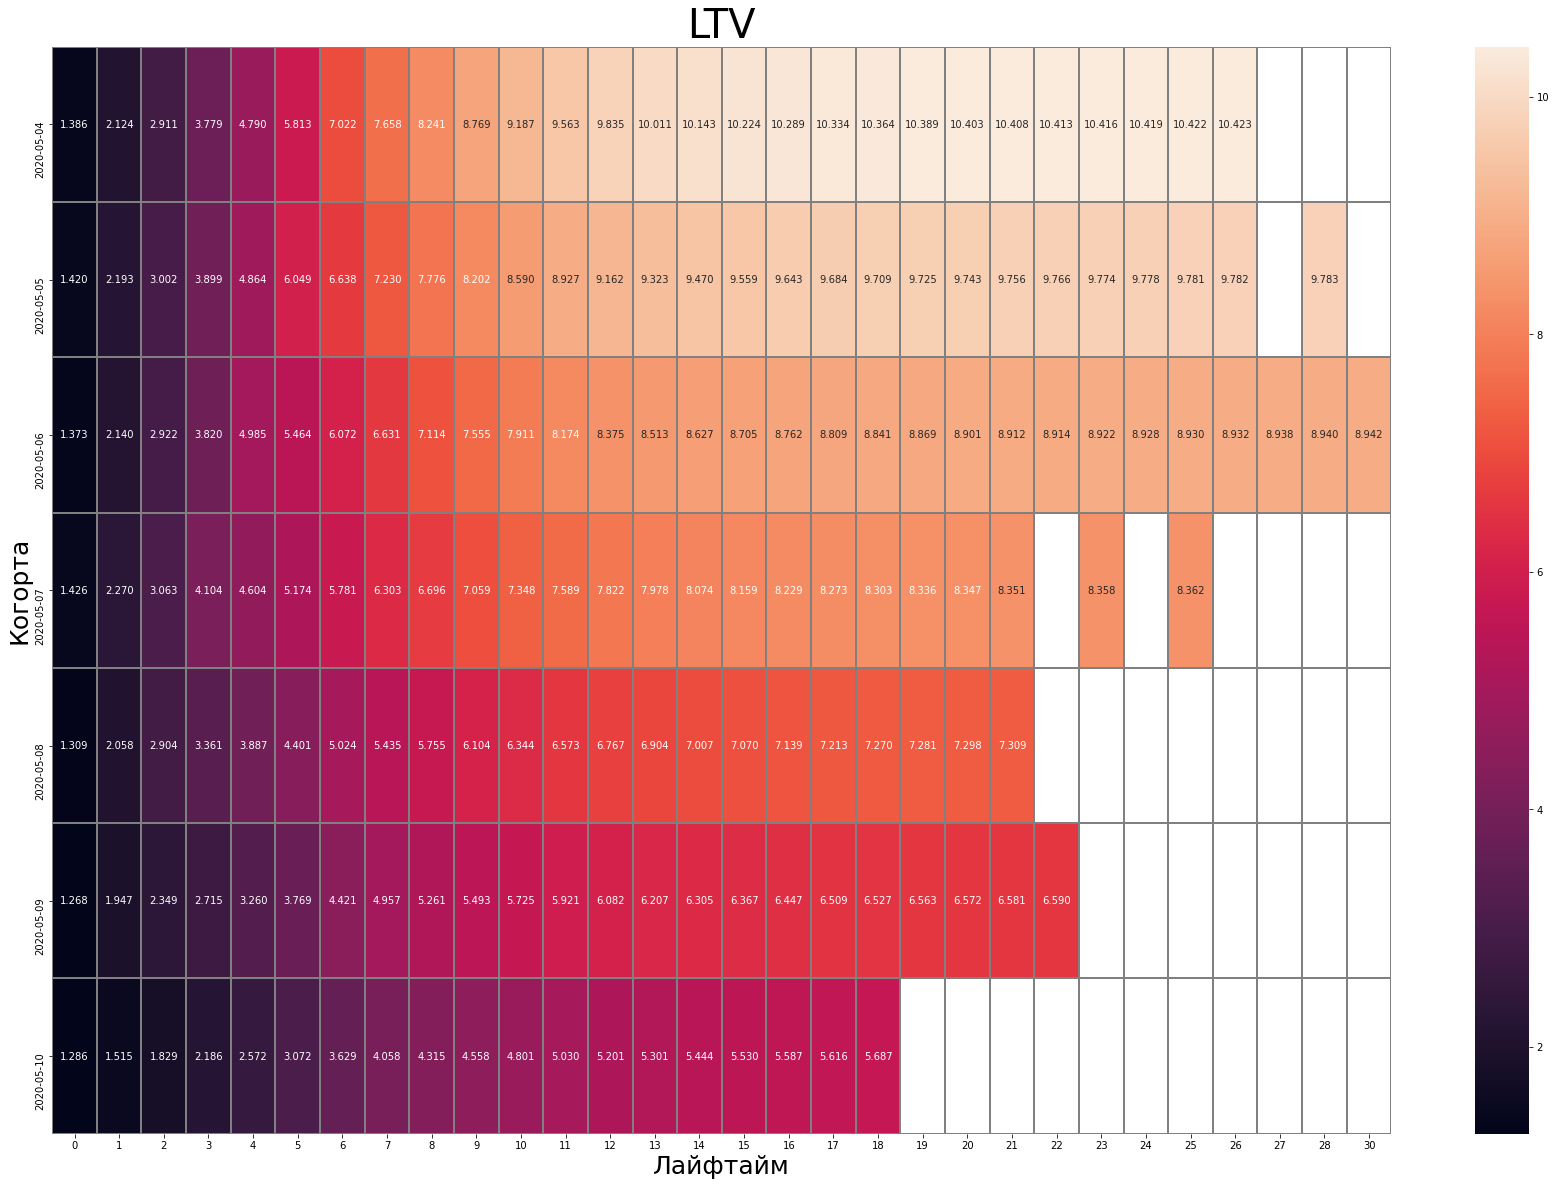

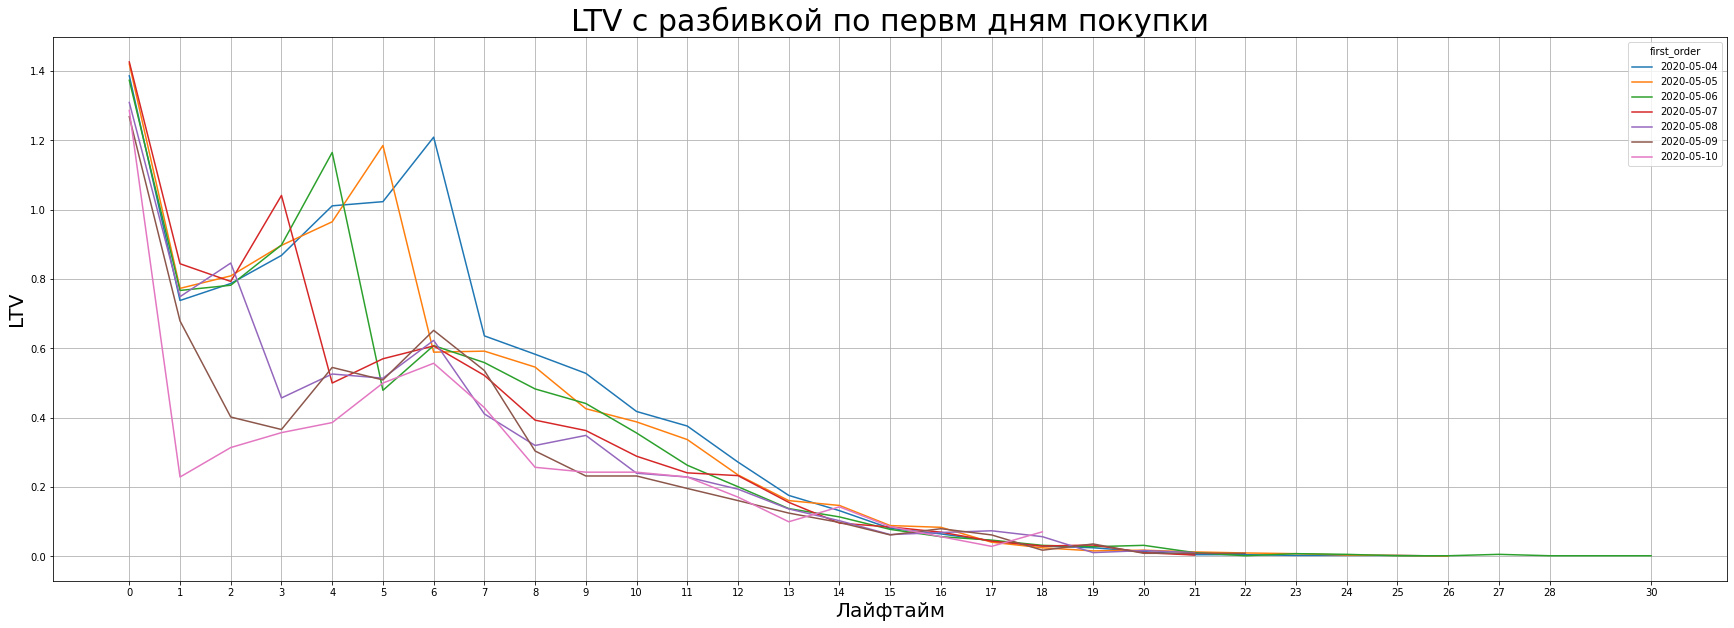

yandex_direct


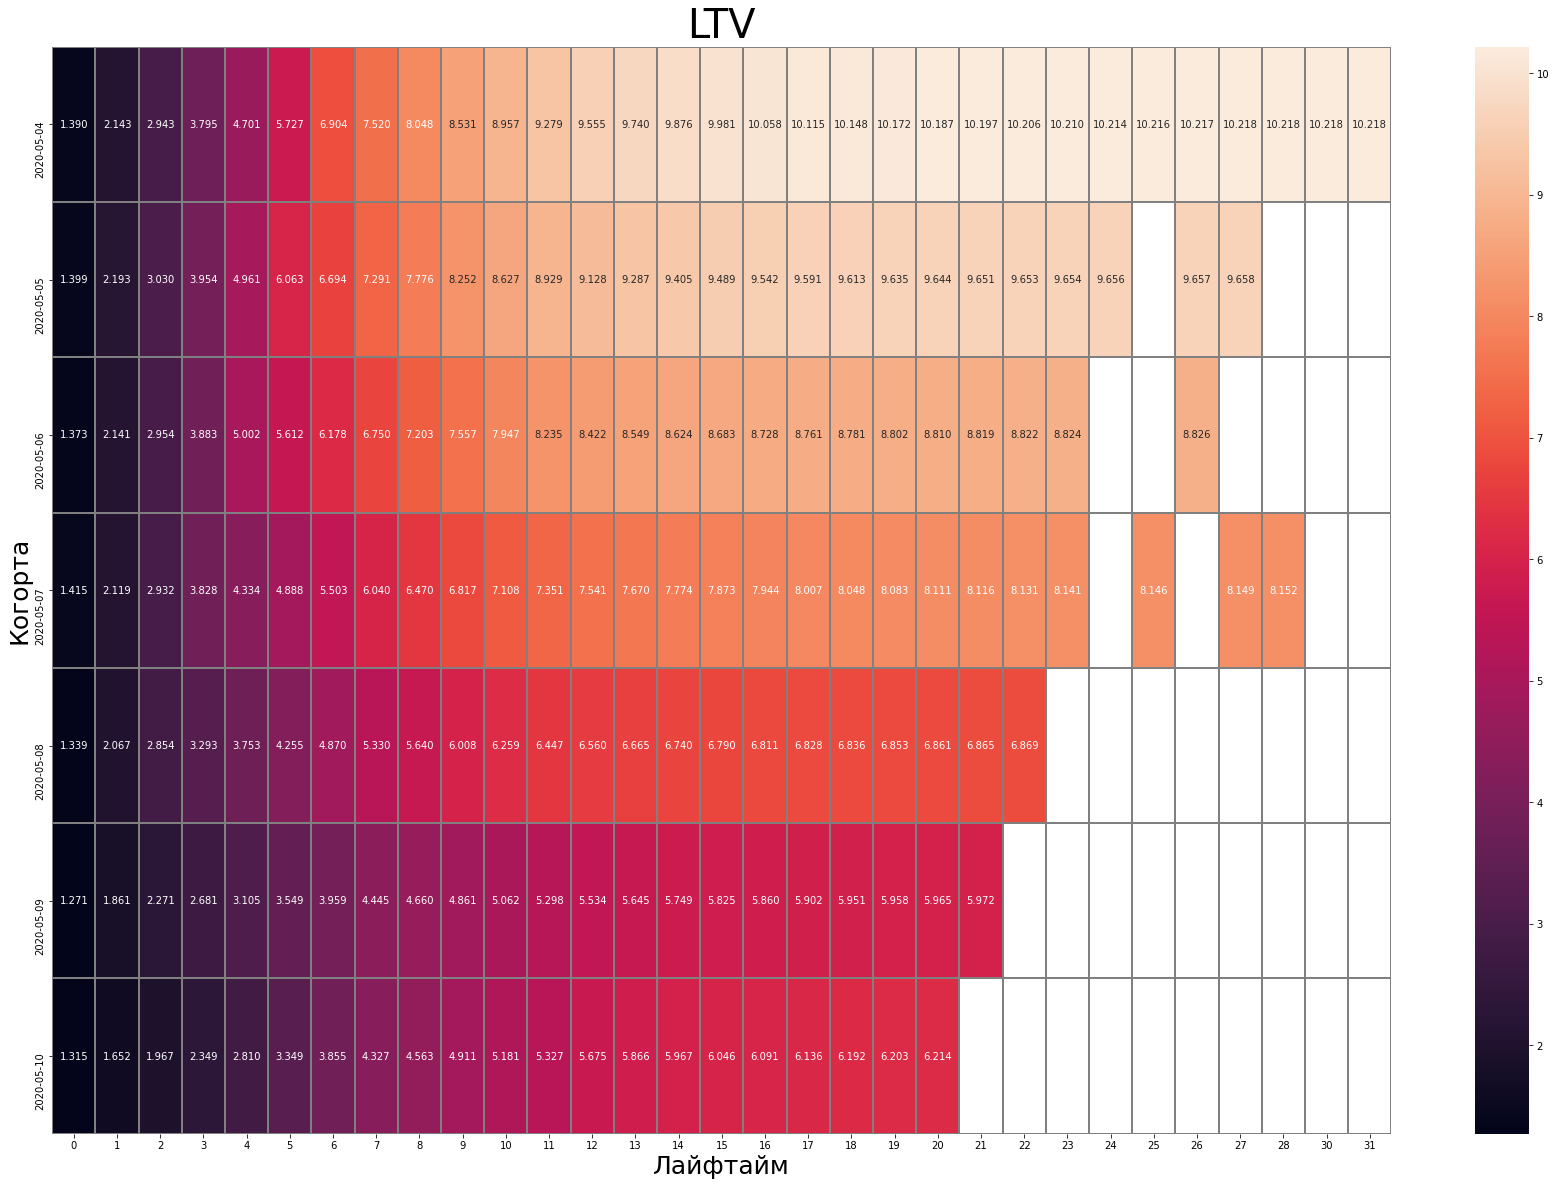

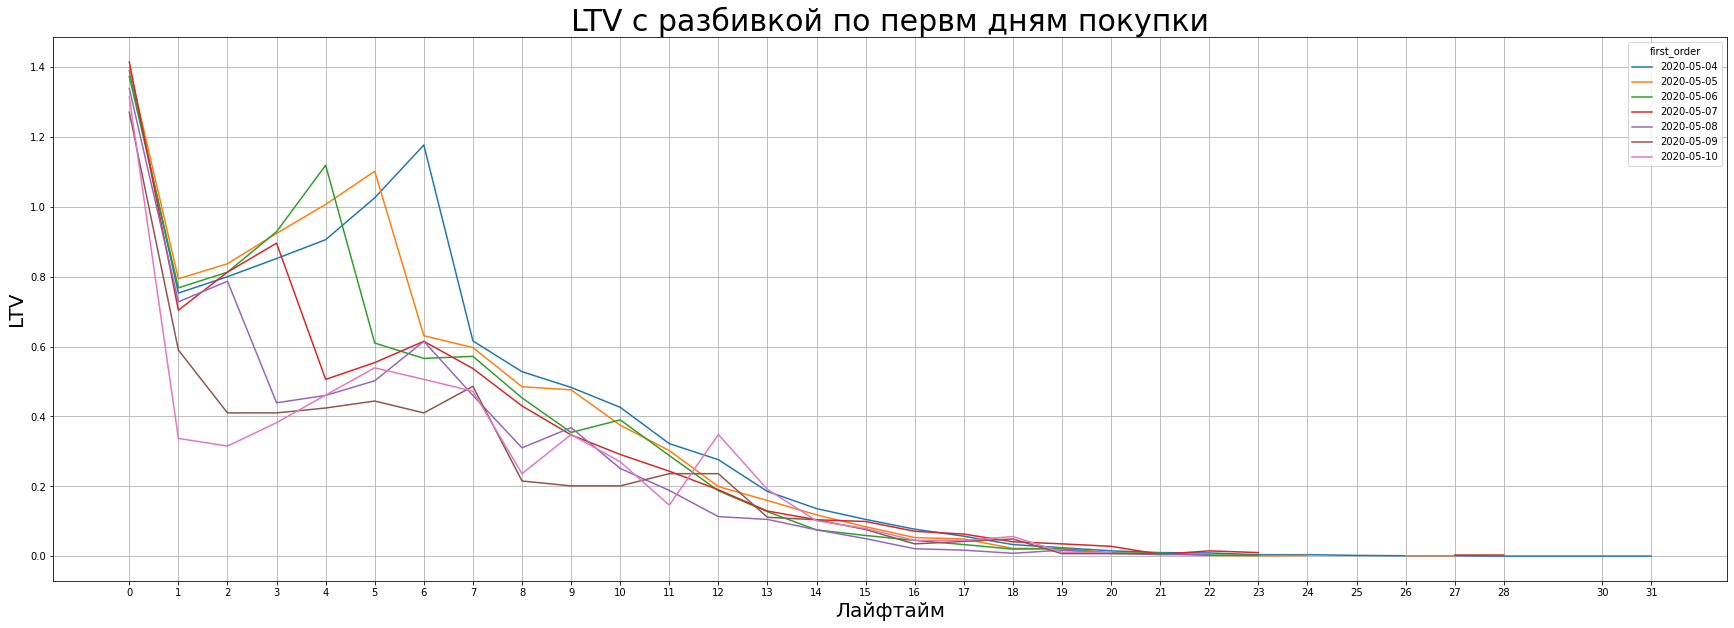

youtube_channel_reklama


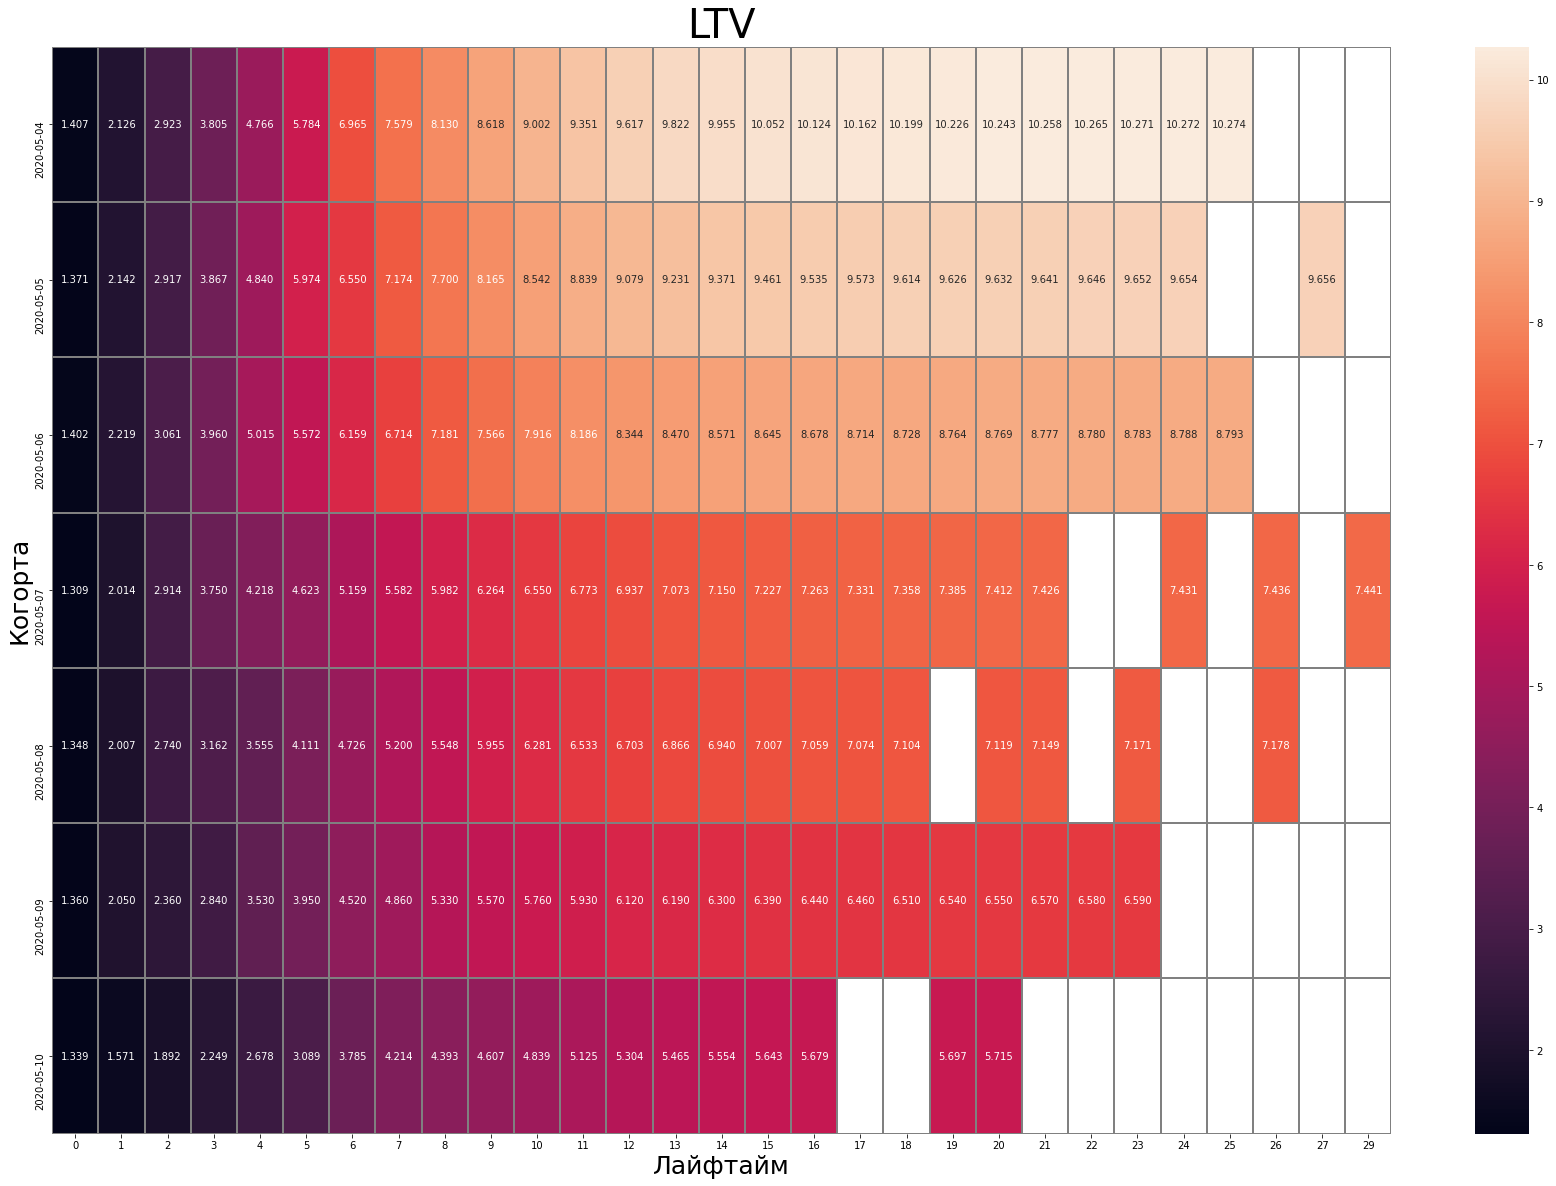

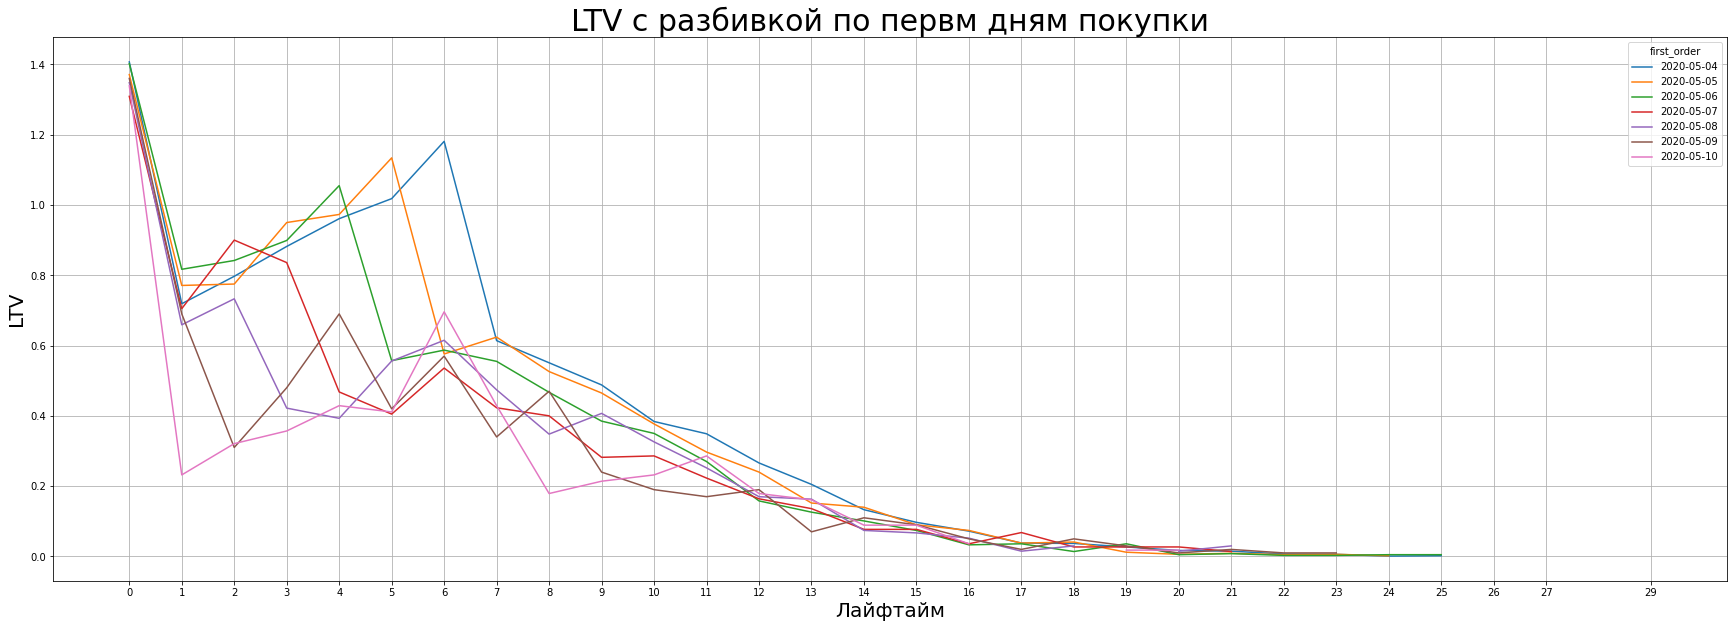

In [54]:
for source in list(cohort['source'].unique()):
    heat_map(cohort[cohort['source'] == source], source)

##### Промежуточные выводы

При детальном рассмотрении LTV по ресурсам и когортам можно сказать, что во всех когортах возможны пропуски припроста LTV, скорее всего это связано с тем, что игроки утратили интерес к игре после прохождения первого уровня. Каких-то отличительных особенностей друг от друга и от общего анализа LTV не было найдено.

##### CAC

In [55]:
costs_cac = costs.groupby(['source', 'day']).agg({'cost':'sum'})

In [56]:
cohort = cohort.merge(costs_cac, left_on=['source', 'first_order'], right_on=['source', 'day'])
cohort['cac'] = cohort['cost'] / cohort['user_id']
cohort

source first_order   order_day  revenue  user_id  age  \
0               facebook_ads  2020-05-04  2020-05-04     1657     1184    0   
1               facebook_ads  2020-05-04  2020-05-05      873     1184    1   
2               facebook_ads  2020-05-04  2020-05-06      991     1184    2   
3               facebook_ads  2020-05-04  2020-05-07     1032     1184    3   
4               facebook_ads  2020-05-04  2020-05-08     1188     1184    4   
..                       ...         ...         ...      ...      ...  ...   
607  youtube_channel_reklama  2020-05-09  2020-05-28        3      100   19   
608  youtube_channel_reklama  2020-05-09  2020-05-29        1      100   20   
609  youtube_channel_reklama  2020-05-09  2020-05-30        2      100   21   
610  youtube_channel_reklama  2020-05-09  2020-05-31        1      100   22   
611  youtube_channel_reklama  2020-05-09  2020-06-01        1      100   23   

          ltv        cost       cac  
0    1.399493  548.354480  0.463137  
1    0.737331  548.354480  0.463137  
2    0.836993  548.354480  0.463137  
3    0.871622  548.354480  0.463137  
4    1.003378  548.354480  0.463137  
..        ...         ...       ...  
607  0.030000   23.314669  0.233147  
608  0.010000   23.314669  0.233147  
609  0.020000   23.314669  0.233147  
610  0.010000   23.314669  0.233147  
611  0.010000   23.314669  0.233147  

[612 rows x 9 columns]

##### Промежуточные выводы

В таблице выше указана средние затраты на привлечение одного пользователя  разбивке по когорам и ресурсам.

##### Общий САС

In [57]:
all_cac = first_order.groupby('source').agg({'user_id':'nunique'})
costs_cac = costs.groupby('source').agg({'cost':'sum'})
all_cac = all_cac.merge(costs_cac, on='source')
all_cac['cac'] = all_cac['cost'] / all_cac['user_id']
all_cac = all_cac.sort_values(by='cac', ascending=False).reset_index()
all_cac

source  user_id         cost       cac
0             facebook_ads     2726  2140.904643  0.785365
1    instagram_new_adverts     3347  2161.441691  0.645785
2            yandex_direct     4817  2233.111449  0.463590
3  youtube_channel_reklama     2686  1068.119204  0.397662

In [58]:
fig = px.bar(all_cac, x='source', y='cac')
fig.update_layout(title='Стоимость привлечения одного пользователя по ресурсам',\
                  xaxis_title='ресурсы', yaxis_title='САС')
fig.update_xaxes(tickangle=45)
fig.show()

##### Промежуточный вывод

- Ресурс с самым большим показателем САС - Фейсбук - 0,785365
- Ресурс с самым низким показателем САС - Ютуб - 0,397662
- Считаю немобходимым отметить ресурс Яндекс, так как он имеет самые больших расходы на рекламу и самое большое количество привлеченных пользователей, при этом его CAC - 0,463590, то есть этот канал очень качественный.

##### ROI

In [59]:
cohort['roi'] = cohort['ltv'] / cohort['cac']
cohort

source first_order   order_day  revenue  user_id  age  \
0               facebook_ads  2020-05-04  2020-05-04     1657     1184    0   
1               facebook_ads  2020-05-04  2020-05-05      873     1184    1   
2               facebook_ads  2020-05-04  2020-05-06      991     1184    2   
3               facebook_ads  2020-05-04  2020-05-07     1032     1184    3   
4               facebook_ads  2020-05-04  2020-05-08     1188     1184    4   
..                       ...         ...         ...      ...      ...  ...   
607  youtube_channel_reklama  2020-05-09  2020-05-28        3      100   19   
608  youtube_channel_reklama  2020-05-09  2020-05-29        1      100   20   
609  youtube_channel_reklama  2020-05-09  2020-05-30        2      100   21   
610  youtube_channel_reklama  2020-05-09  2020-05-31        1      100   22   
611  youtube_channel_reklama  2020-05-09  2020-06-01        1      100   23   

          ltv        cost       cac       roi  
0    1.399493  548.354480  0.463137  3.021768  
1    0.737331  548.354480  0.463137  1.592036  
2    0.836993  548.354480  0.463137  1.807225  
3    0.871622  548.354480  0.463137  1.881994  
4    1.003378  548.354480  0.463137  2.166482  
..        ...         ...       ...       ...  
607  0.030000   23.314669  0.233147  0.128674  
608  0.010000   23.314669  0.233147  0.042891  
609  0.020000   23.314669  0.233147  0.085783  
610  0.010000   23.314669  0.233147  0.042891  
611  0.010000   23.314669  0.233147  0.042891  

[612 rows x 10 columns]

In [60]:
def heat_map_roi(data, source):
    roi_source = data.pivot_table(index='first_order', columns='age', values='roi', aggfunc='mean').round(3)
    
    print(source)
    plt.figure(figsize=(30, 20))
    plt.title('ROI', size=40)
    ax = sns.heatmap(roi_source.cumsum(axis=1), annot=True, fmt='.3f', linewidths=1, linecolor='grey')
    plt.xlabel('Лайфтайм', size=25)
    plt.ylabel('Когорта', size=25)
    plt.show()

facebook_ads


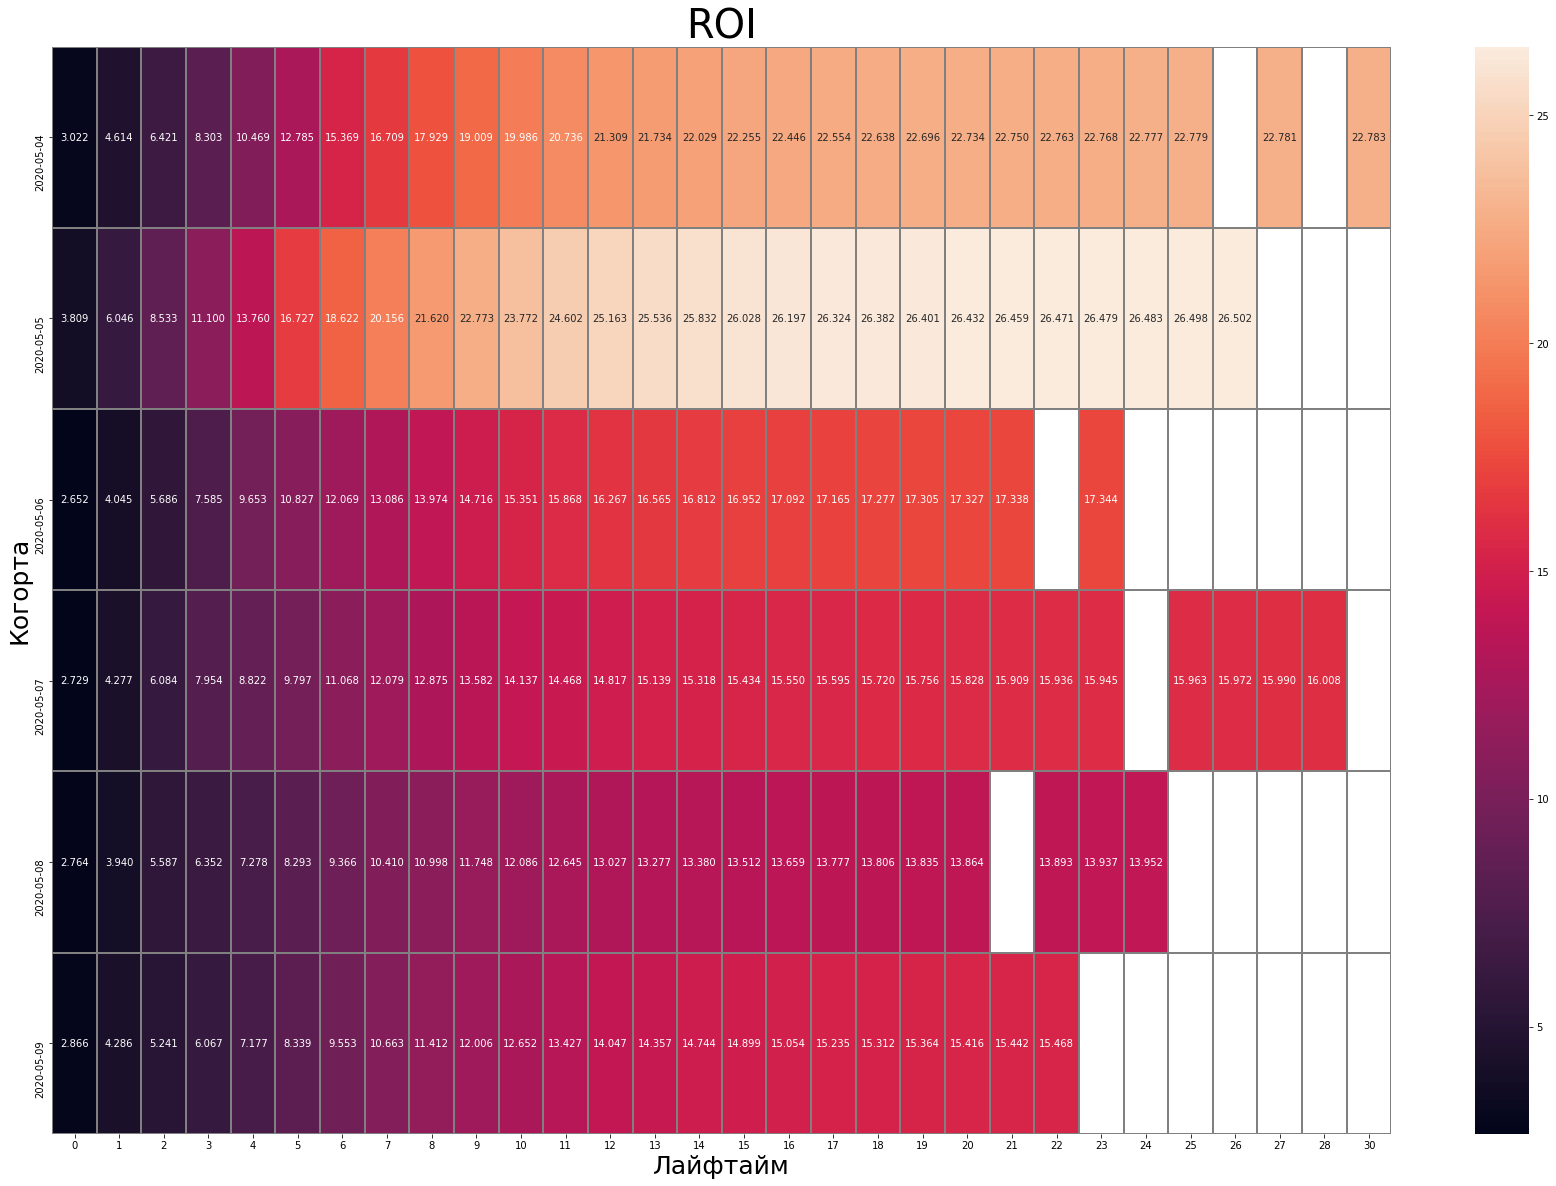

instagram_new_adverts


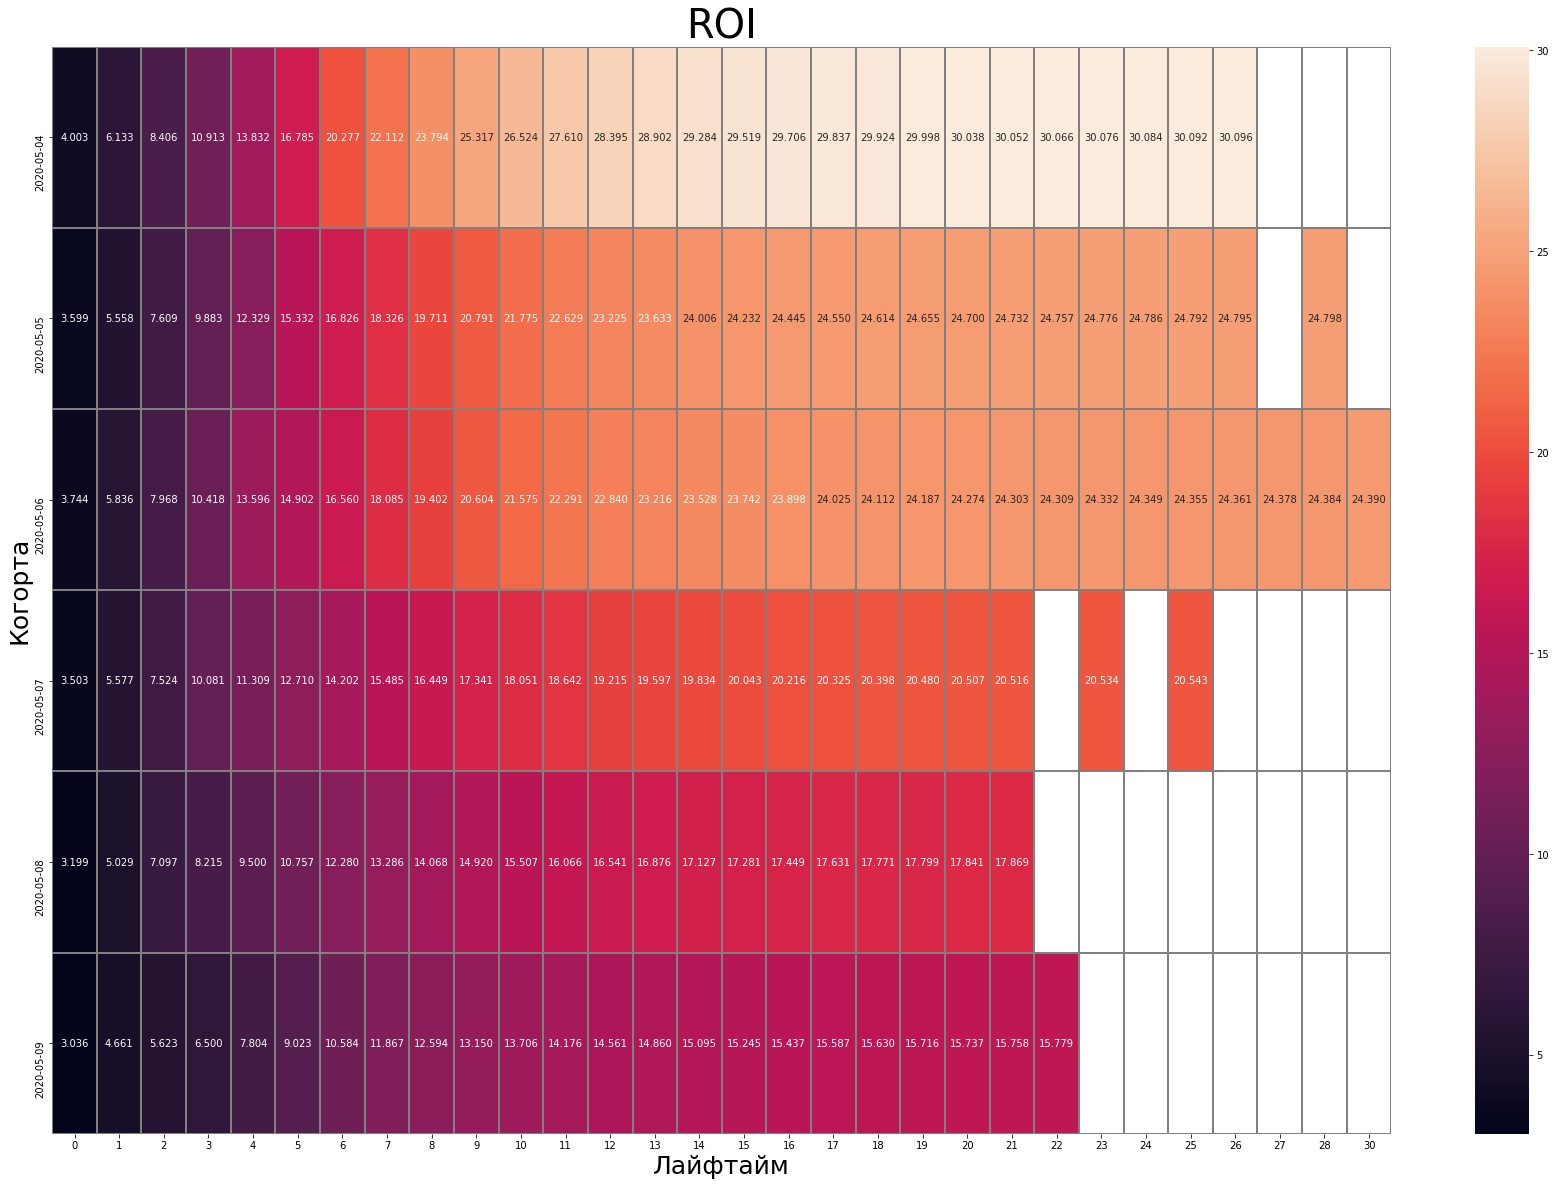

yandex_direct


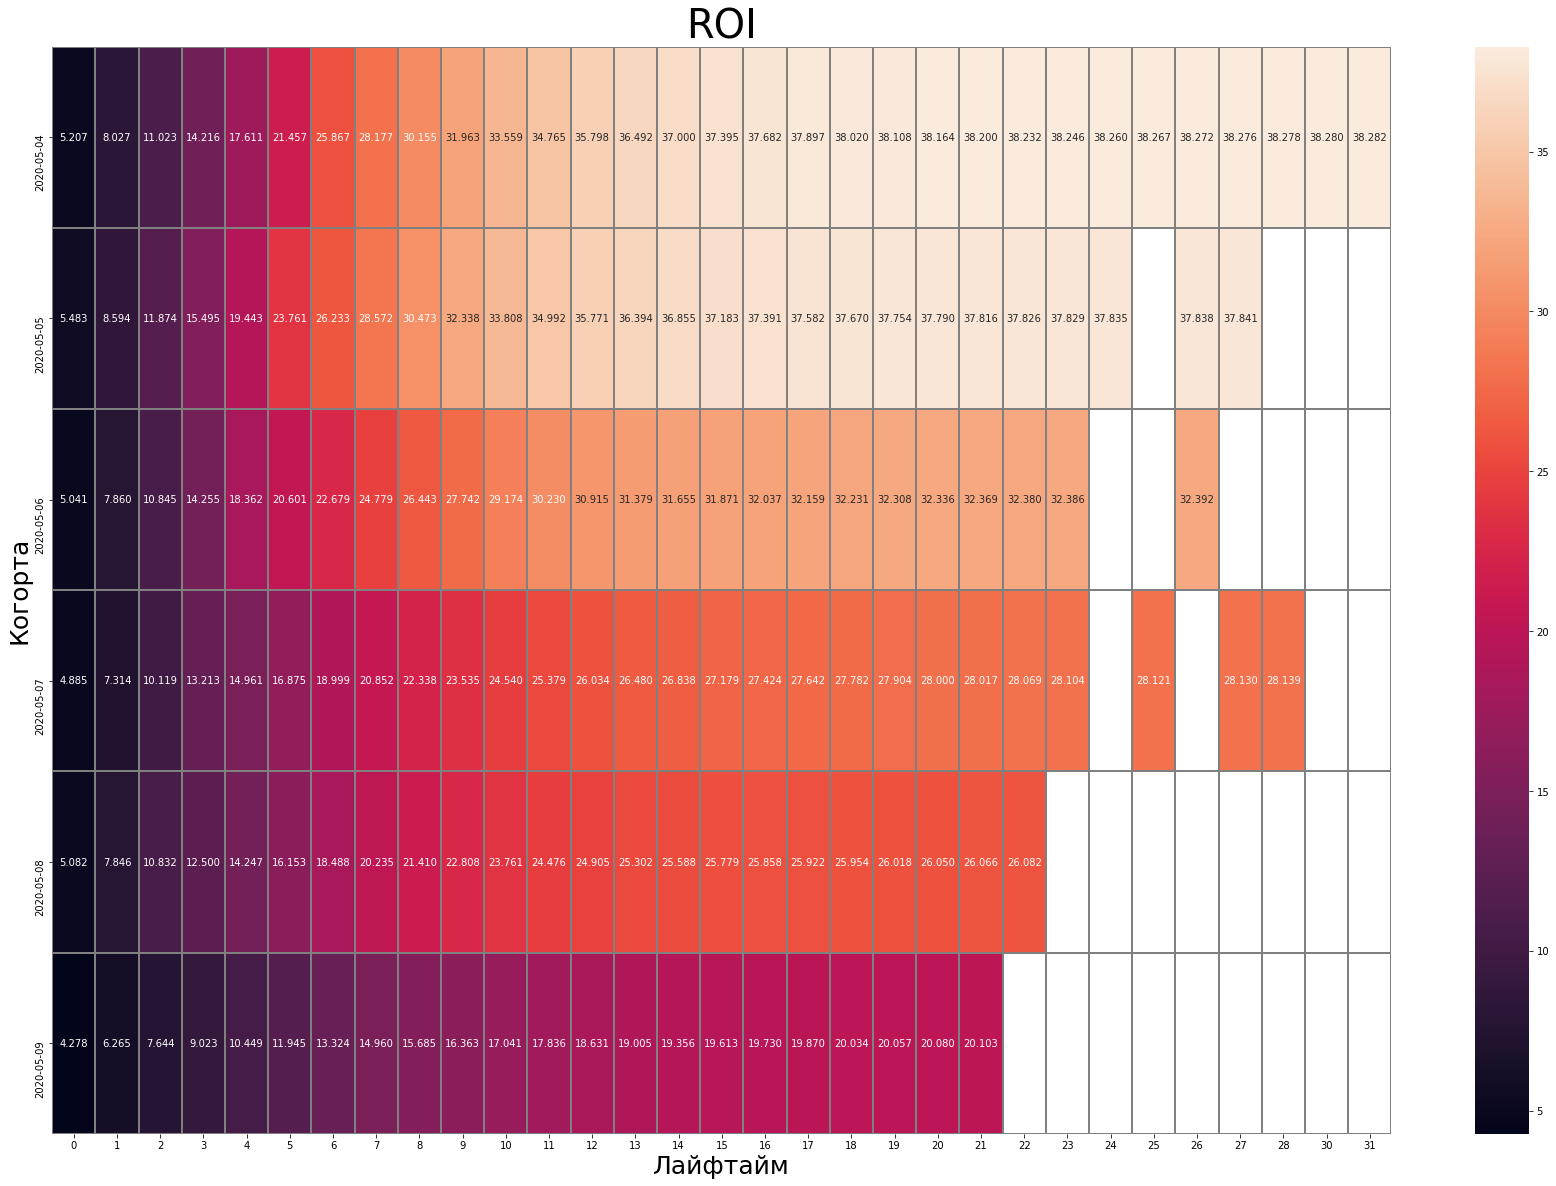

youtube_channel_reklama


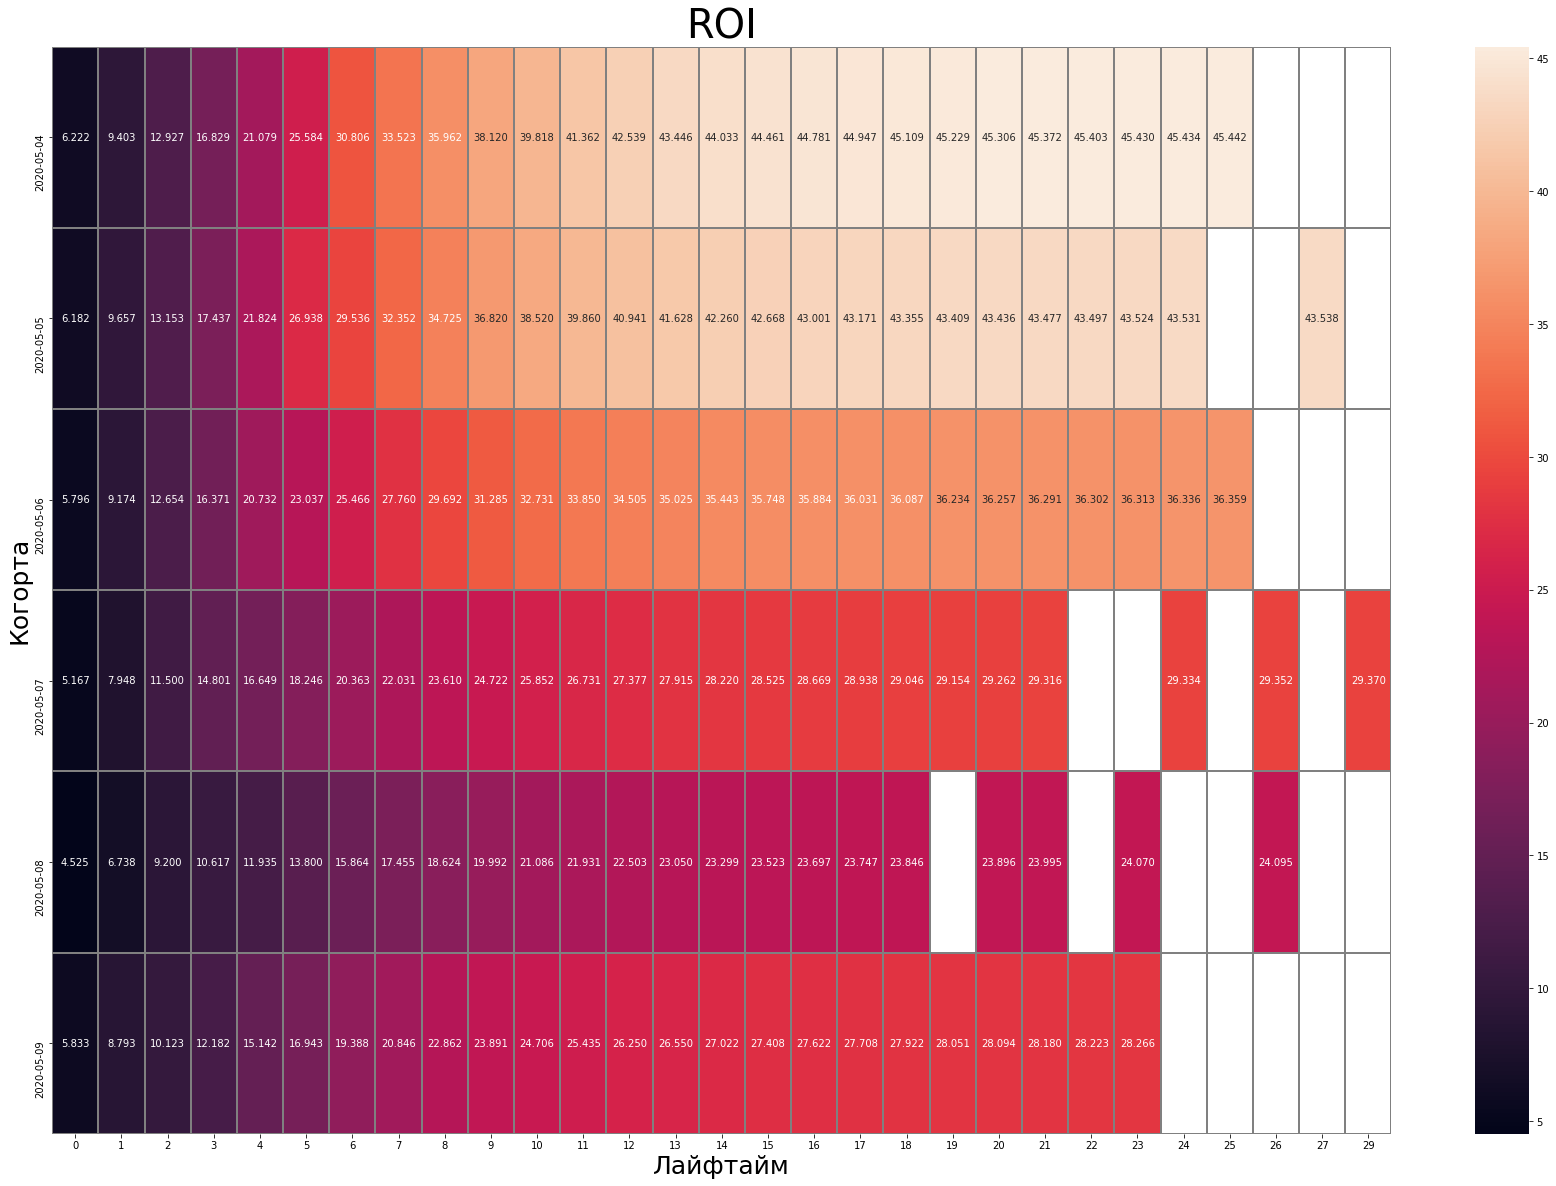

In [61]:
for source in list(cohort['source'].unique()):
    heat_map_roi(cohort[cohort['source'] == source], source)

##### Промежуточные выводы

- Лучшие показатели ROI по ресурсу Фейсбук продемонстрировала когорта 2020-05-05, что говорит о том, что окупаемость этой когорты самая быстрая и самая большая
- Лучшие показатели ROI по ресурсу Инстаграм продемонстрировала когорта 2020-05-04, что говорит о том, что окупаемость этой когорты самая быстрая и самая большая
- Лучшие показатели ROI по ресурсу Яндекс продемонстрировала когорта 2020-05-04 и 2020-05-05, что говорит о том, что окупаемость этих когорт самая быстрая и самая большая
- Лучшие показатели ROI по ресурсу Ютуб продемонстрировала когорта 2020-05-04, что говорит о том, что окупаемость этой когорты самая быстрая и самая большая

##### ROI суммарно по ресурсам

In [62]:
cohort_all = cohort.groupby(['source', 'order_day']).agg({'roi':'mean'}).sort_values(by=['source', 'order_day'], ascending=True).reset_index()

In [63]:
def heat_map_all_roi(data, source):
    roi_all = data.pivot_table(columns='order_day', values='roi', aggfunc='mean').round(3)
    print(source)
    plt.figure(figsize=(30, 10))
    plt.title('ROI', size=10)
    ax = sns.heatmap(roi_all.cumsum(axis=1), annot=True, fmt='.3f', linewidths=1, linecolor='grey')
    plt.xlabel('Лайфтайм', size=10)
    plt.ylabel(source, size=10)
    plt.yticks(rotation = 90)
    plt.show()
    
    roi_all.T.plot(grid=True, figsize=(15, 10), xticks=list(roi_all.columns.values))
    plt.title('ROI ресурса по лайфтаймам', size=10)
    plt.ylabel('ROI', size=10)
    plt.xlabel('Лайфтайм', size=10)
    plt.xticks(rotation = 45)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.show()

facebook_ads


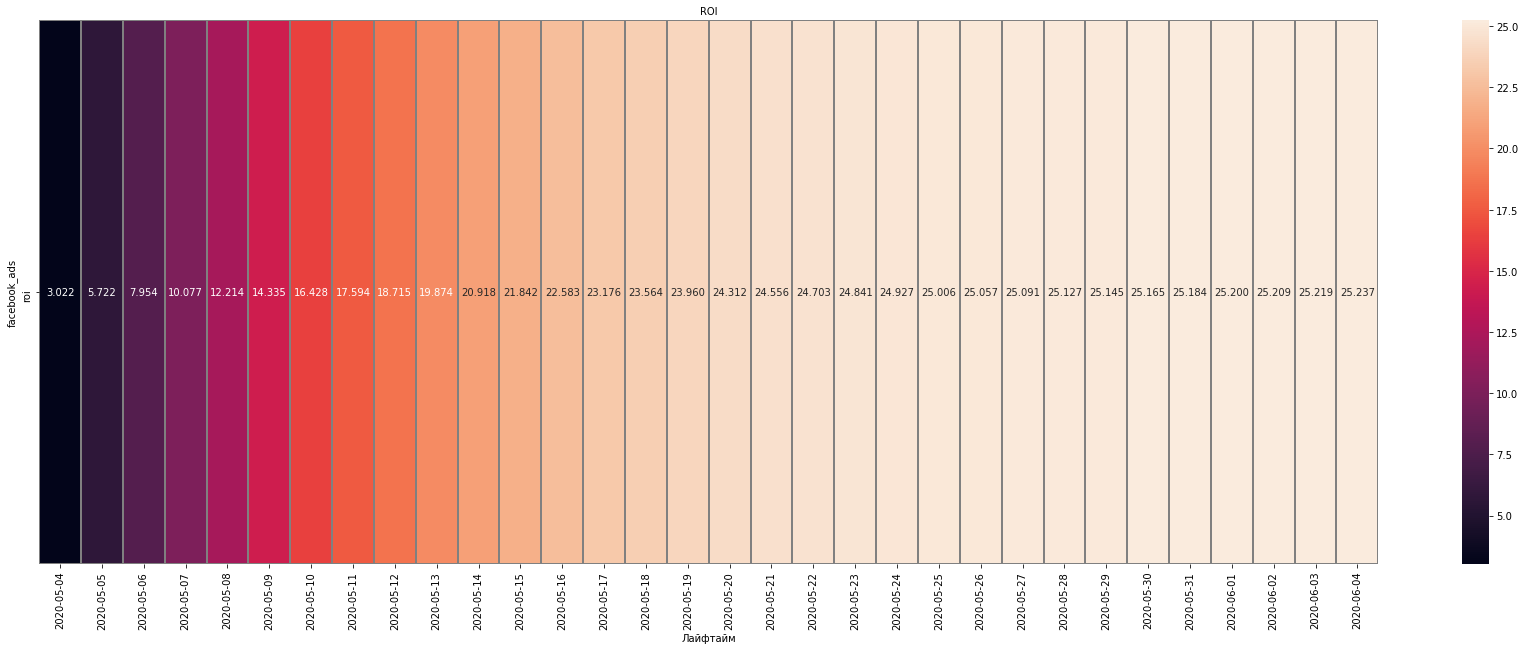

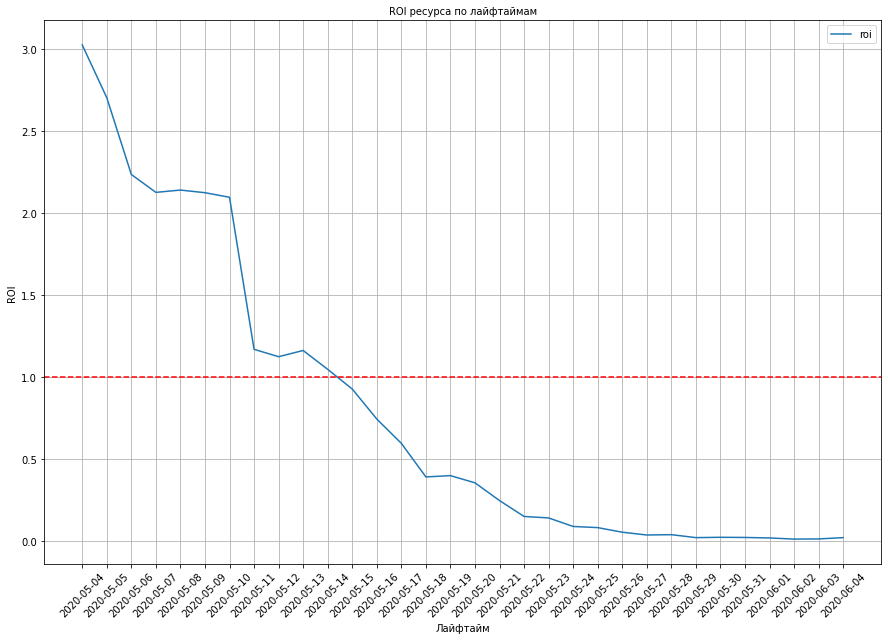

instagram_new_adverts


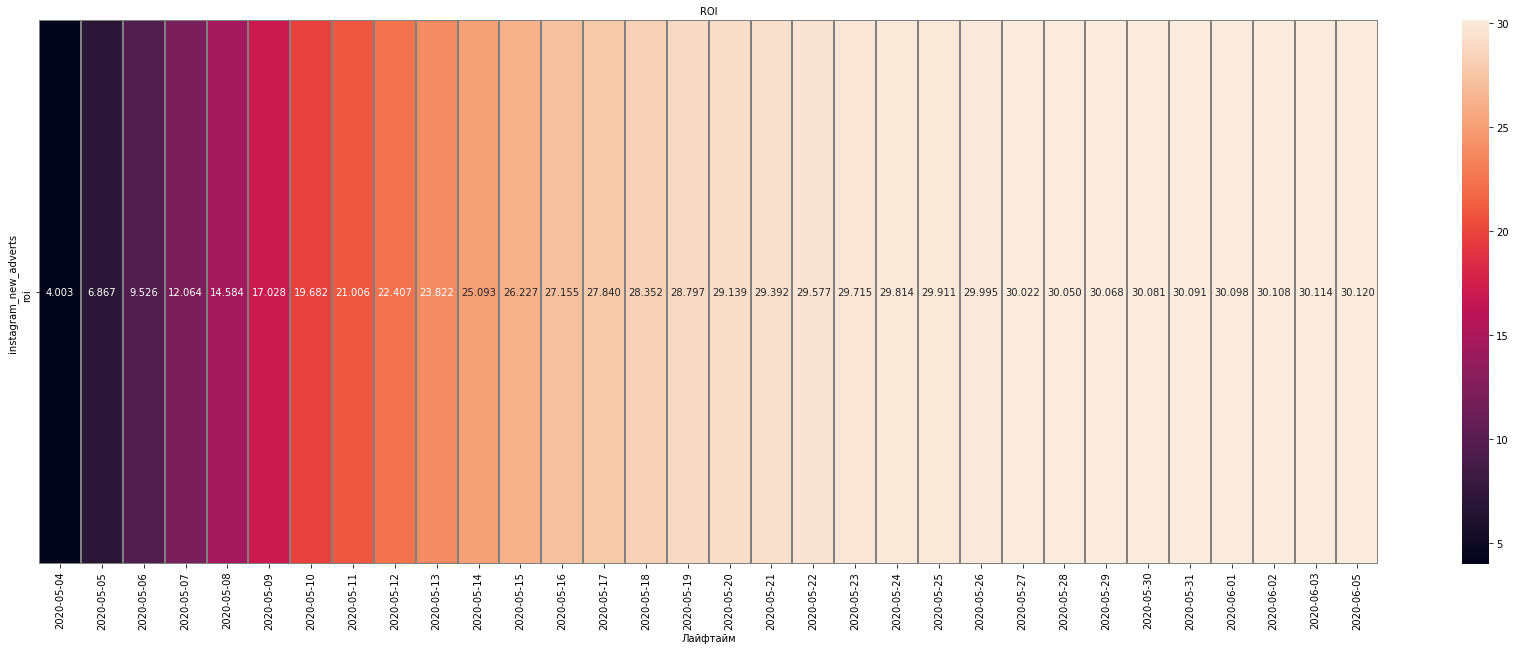

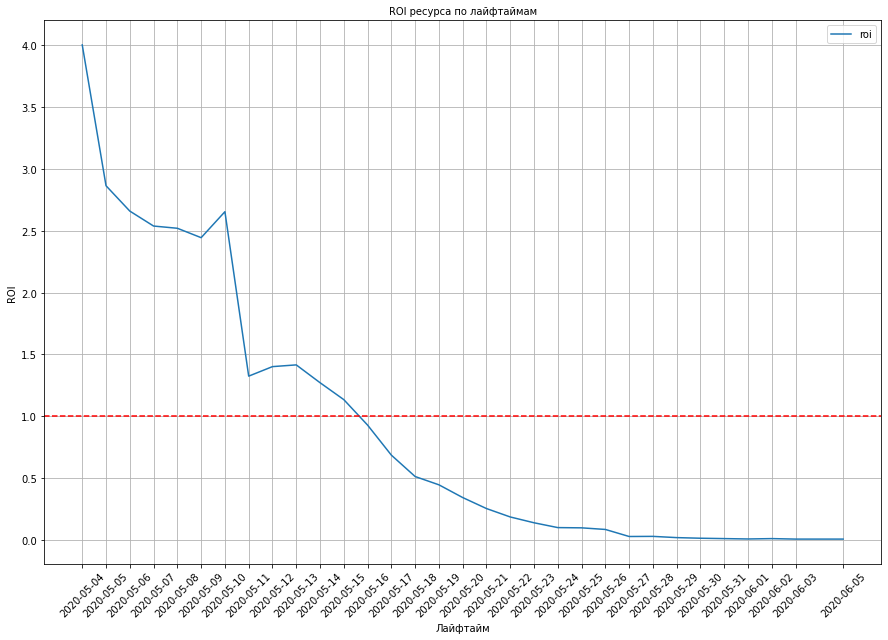

yandex_direct


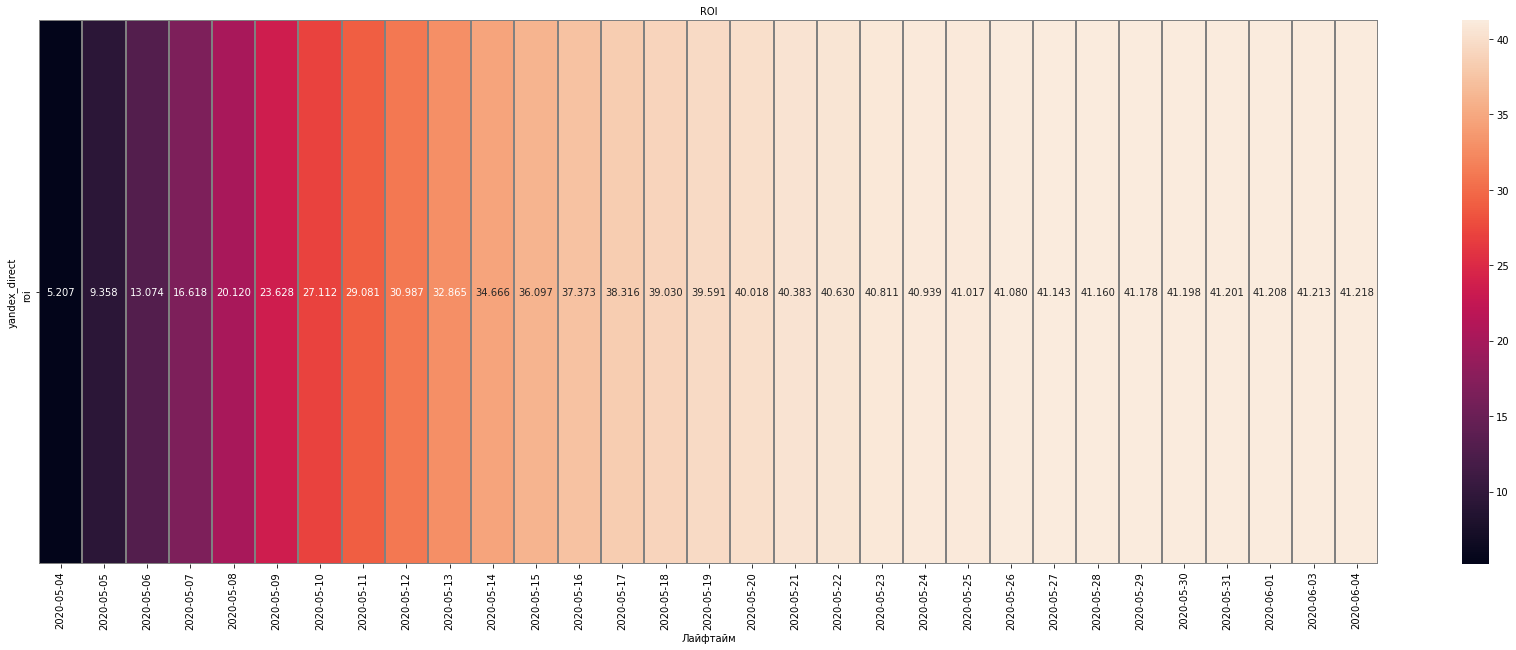

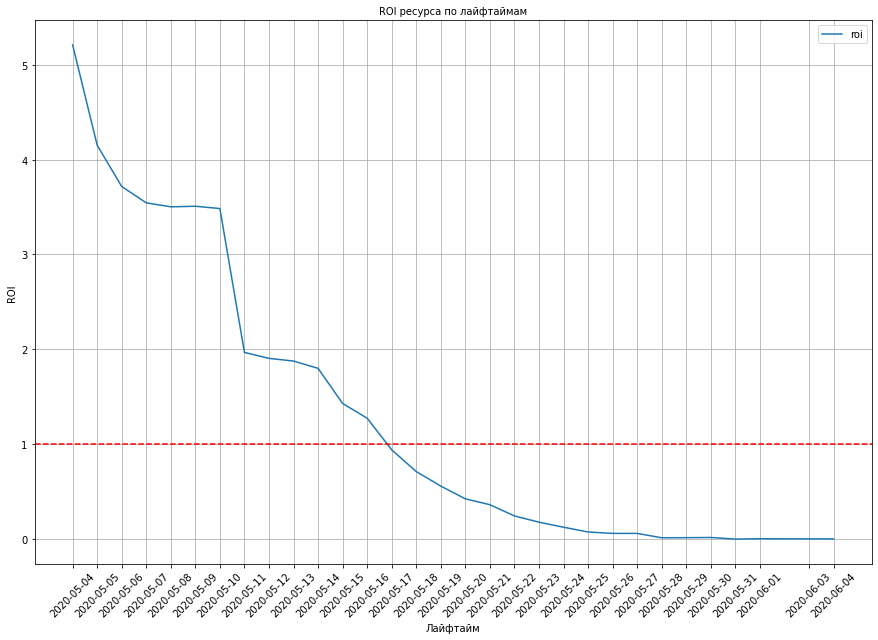

youtube_channel_reklama


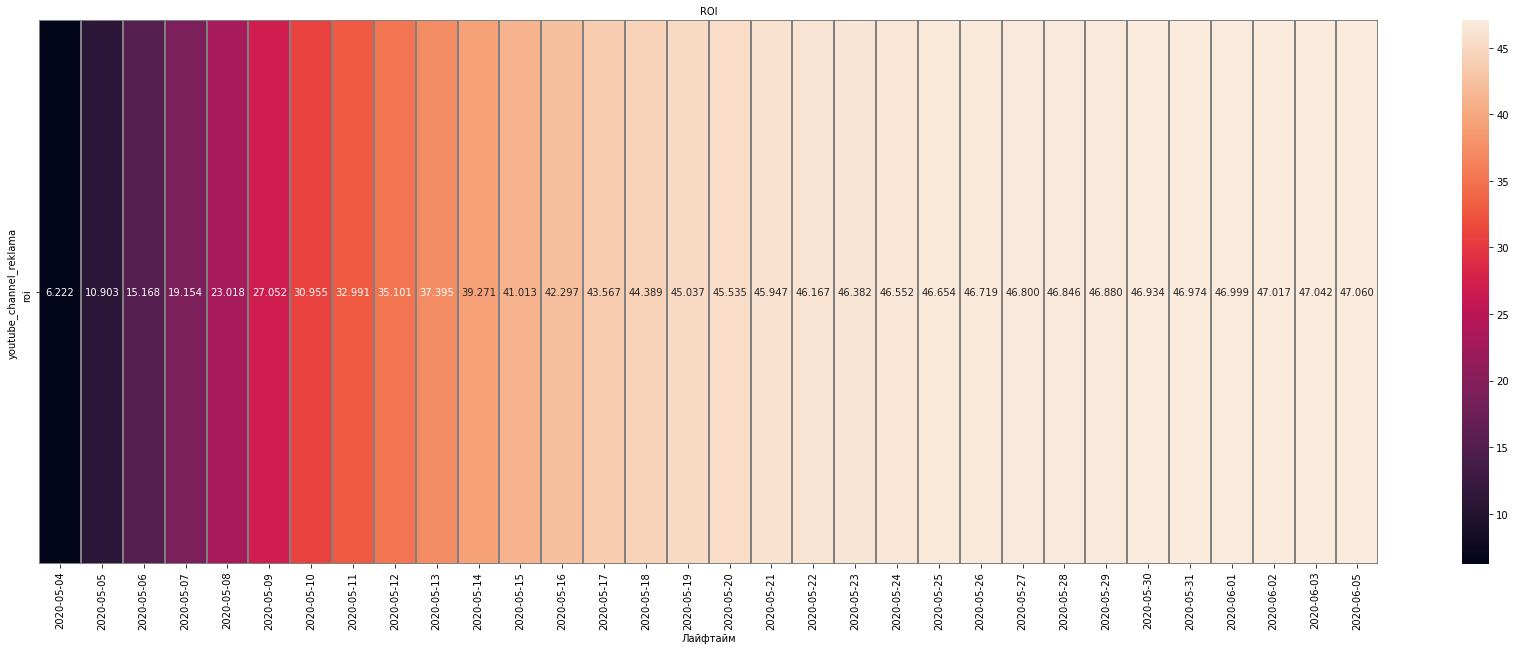

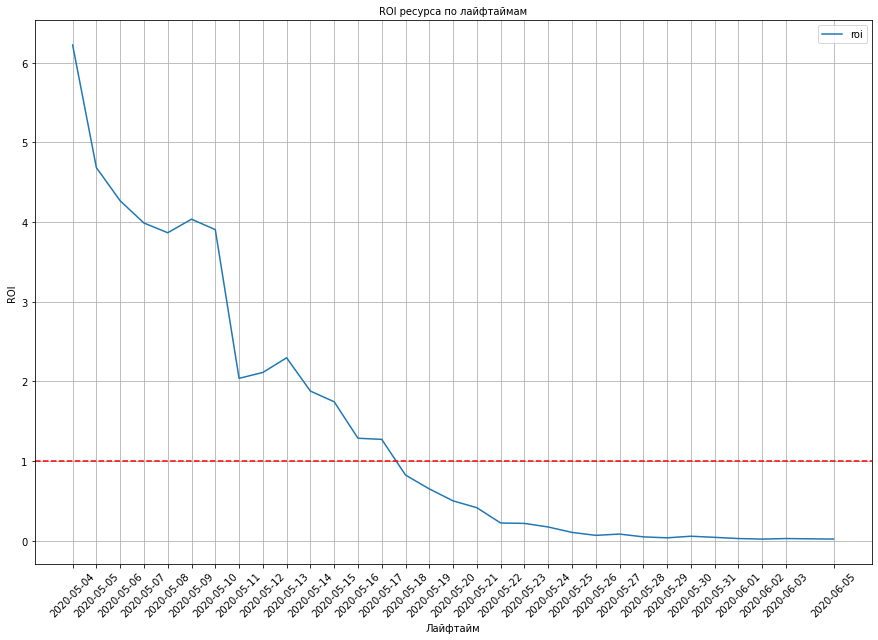

In [64]:
for source in list(cohort_all['source'].unique()):
    heat_map_all_roi(cohort_all[cohort_all['source'] == source], source)

##### Промежуточный вывод

Как мы видим, все хитмепы и все графики между собой схожи. По всем этим графикам можно сделать вывод, что при условно взятой 1 за каждый просмотр рекламе при строительстве, окупаемость вложенных средств в рекламу достаточно высокая в первые дни жизни, и затем в 13-16 день возврат на инвестиции становится ниже окупаемостию То есть самые прибыльное время это первые две недели после первого захода пользователя в игру. Предположу, что после истечения двух недель игрок проходит первый уровень, а так как в игре он всего один, он просто теряет интерес и покиидает игру, из-за этого падает показатель ROI.

#### Рассчитать конверсию пришедших пользователей с течением времени (график)

#### Retention Rate

In [65]:
retention_first = game_source.groupby(['source', 'user_id']).agg({'order_day':'min'}).reset_index()
retention_first = retention_first.rename(columns={'order_day' : 'first_order'})

In [66]:
retention_rate = retention_first.merge(game, on='user_id')
retention_rate['event_datetime'] = pd.to_datetime(retention_rate['event_datetime']).dt.date
retention_table = retention_rate.groupby(['source', 'first_order', 'event_datetime']).agg({'user_id':'nunique'})
retention_table = retention_table.sort_values(by=['source', 'first_order', 'event_datetime']).reset_index()
retention_table = retention_table.rename(columns={'user_id':'days_user'})

In [67]:
retention_table = cohort.merge(retention_table, left_on=['source', 'first_order', 'order_day'], \
                               right_on=['source', 'first_order', 'event_datetime'])
retention_table = retention_table.drop(['revenue', 'ltv', 'cost', 'cac', 'roi', 'event_datetime'], axis=1)
retention_table['retention_rate'] = retention_table['days_user'] / retention_table['user_id'] 

In [68]:
retention_table

source first_order   order_day  user_id  age  days_user  \
0               facebook_ads  2020-05-04  2020-05-04     1184    0       1184   
1               facebook_ads  2020-05-04  2020-05-05     1184    1        634   
2               facebook_ads  2020-05-04  2020-05-06     1184    2        652   
3               facebook_ads  2020-05-04  2020-05-07     1184    3        703   
4               facebook_ads  2020-05-04  2020-05-08     1184    4        717   
..                       ...         ...         ...      ...  ...        ...   
607  youtube_channel_reklama  2020-05-09  2020-05-28      100   19          3   
608  youtube_channel_reklama  2020-05-09  2020-05-29      100   20          1   
609  youtube_channel_reklama  2020-05-09  2020-05-30      100   21          2   
610  youtube_channel_reklama  2020-05-09  2020-05-31      100   22          1   
611  youtube_channel_reklama  2020-05-09  2020-06-01      100   23          1   

     retention_rate  
0          1.000000  
1          0.535473  
2          0.550676  
3          0.593750  
4          0.605574  
..              ...  
607        0.030000  
608        0.010000  
609        0.020000  
610        0.010000  
611        0.010000  

[612 rows x 7 columns]

In [69]:
def retention_rate(data, source):
    retention_rate = data.pivot_table(index='first_order', columns='age', values='retention_rate', aggfunc='mean').round(3)

    print(source)
    plt.figure(figsize=(30, 20))
    plt.title('Retenrion rate', size=40)
    ax = sns.heatmap(retention_rate, annot=True, fmt='.3f', linewidths=1, linecolor='grey')
    plt.xlabel('Лайфтайм', size=25)
    plt.ylabel('Когорта', size=25)
    plt.show()
    
    retention_rate.T.plot(grid=True, figsize=(30, 10), xticks=list(retention_rate.columns.values))
    plt.title('Retenrion rate с разбивкой по первм дням покупки', size=30)
    plt.ylabel('Retenrion rate', size=20)
    plt.xlabel('Лайфтайм', size=20)
    plt.show()

facebook_ads


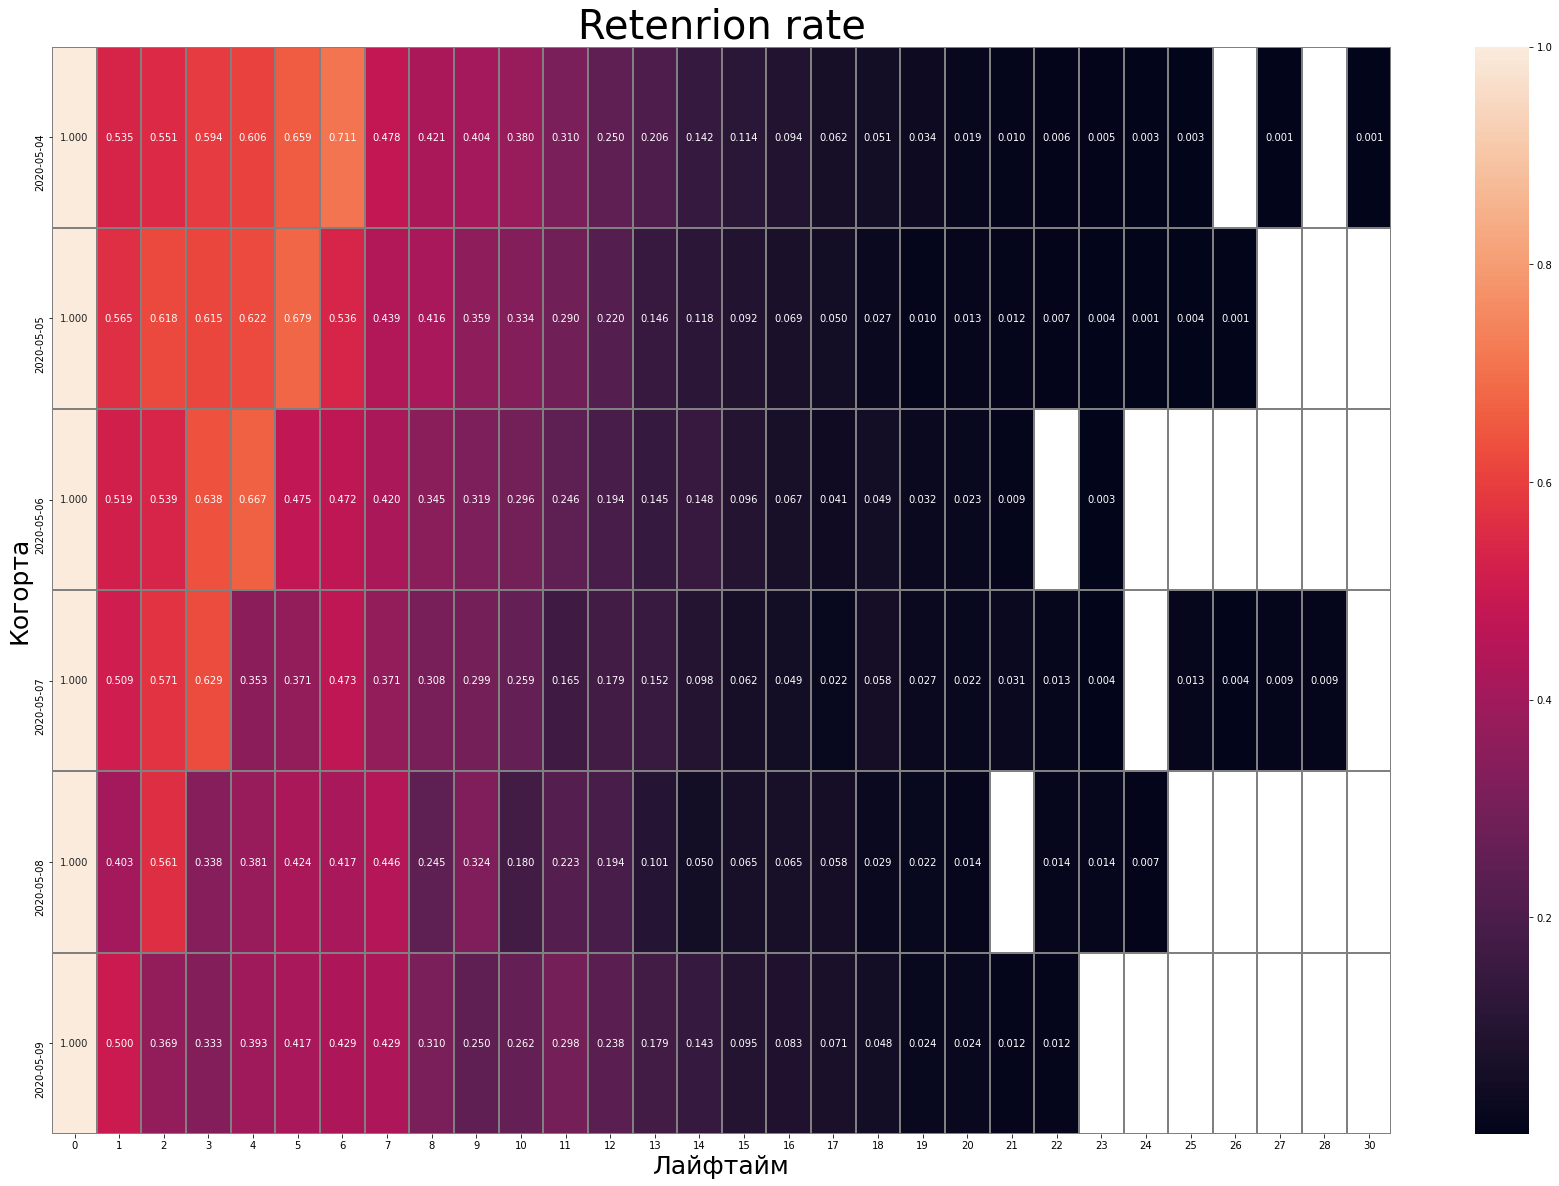

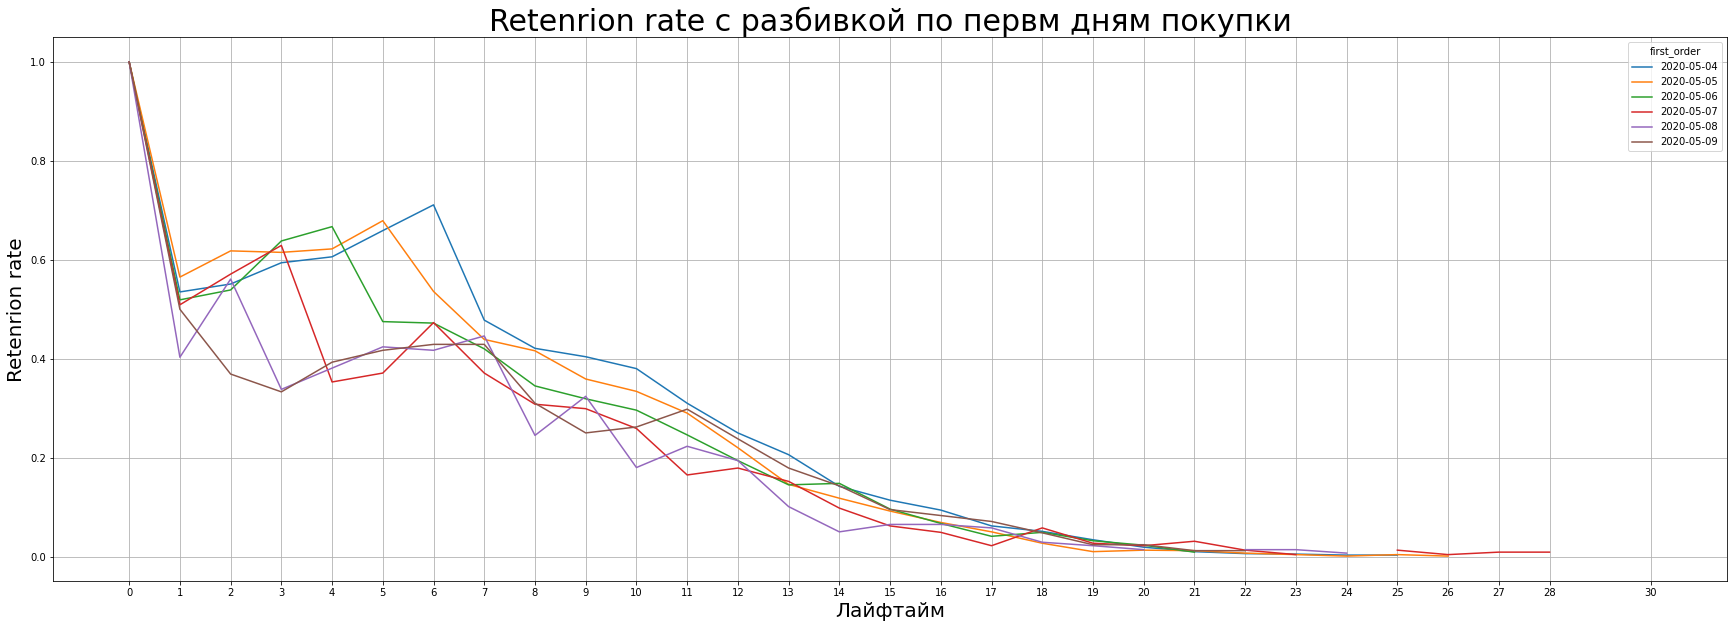

instagram_new_adverts


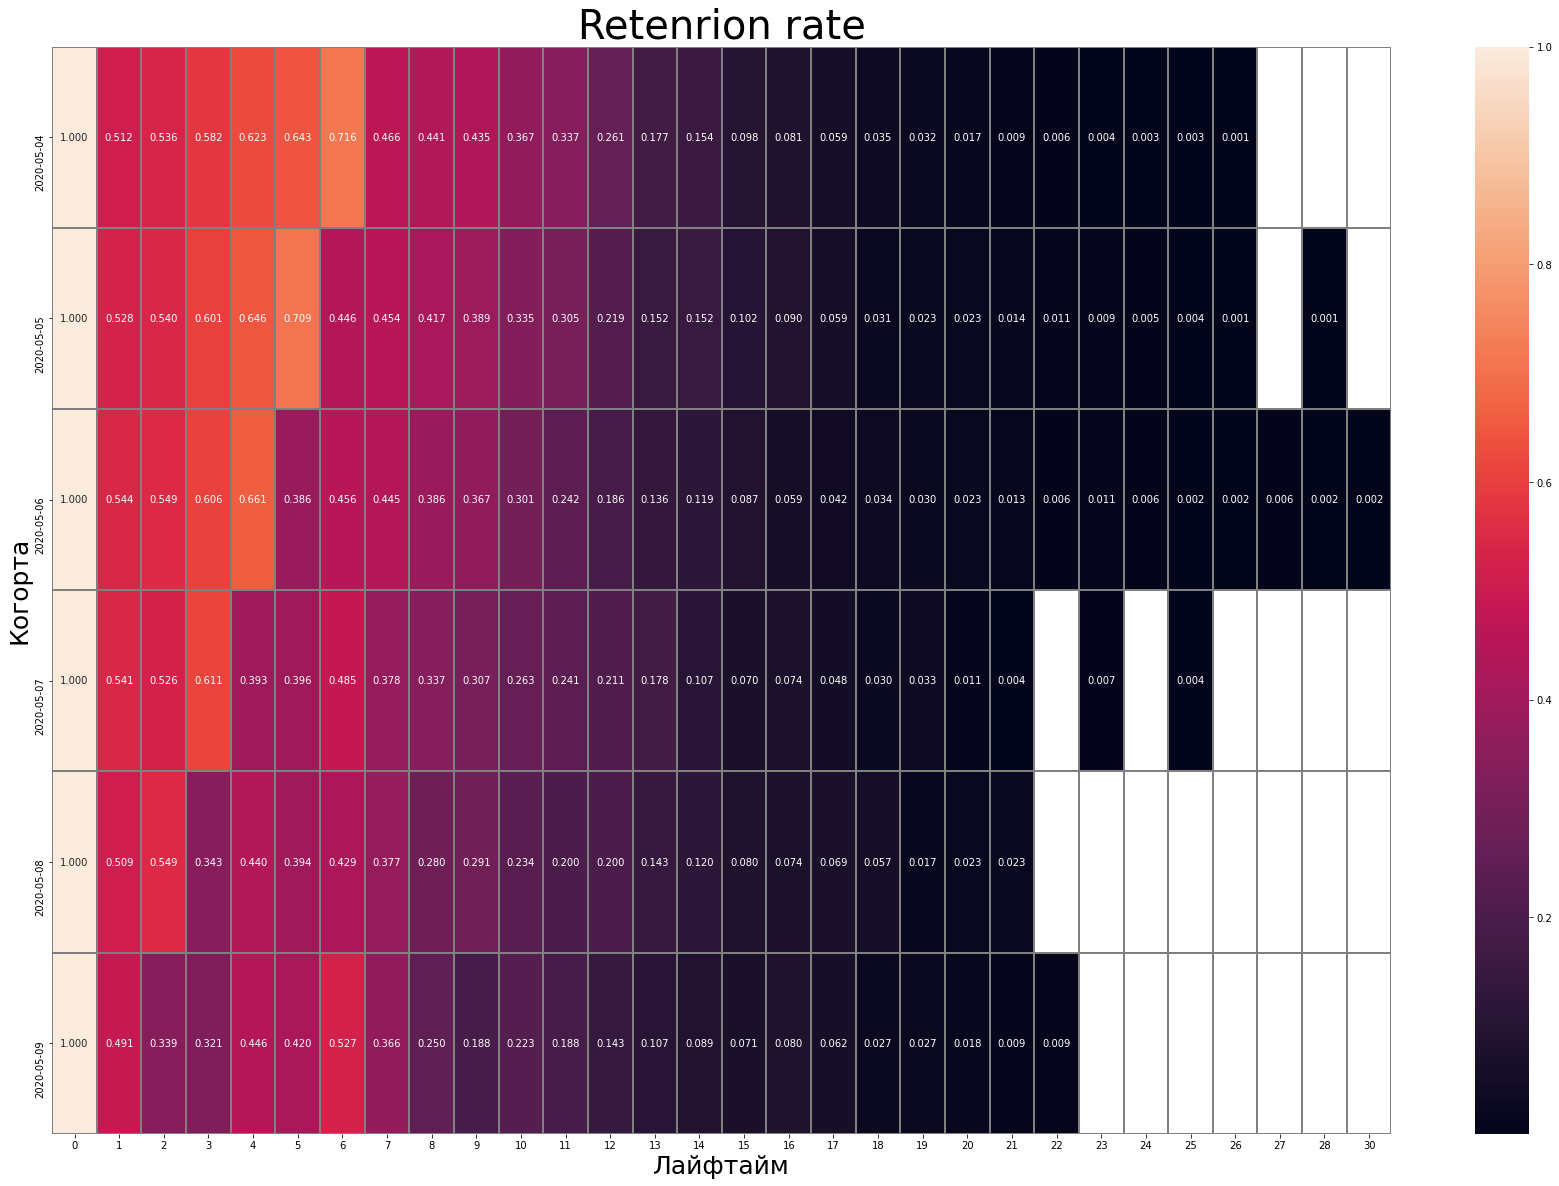

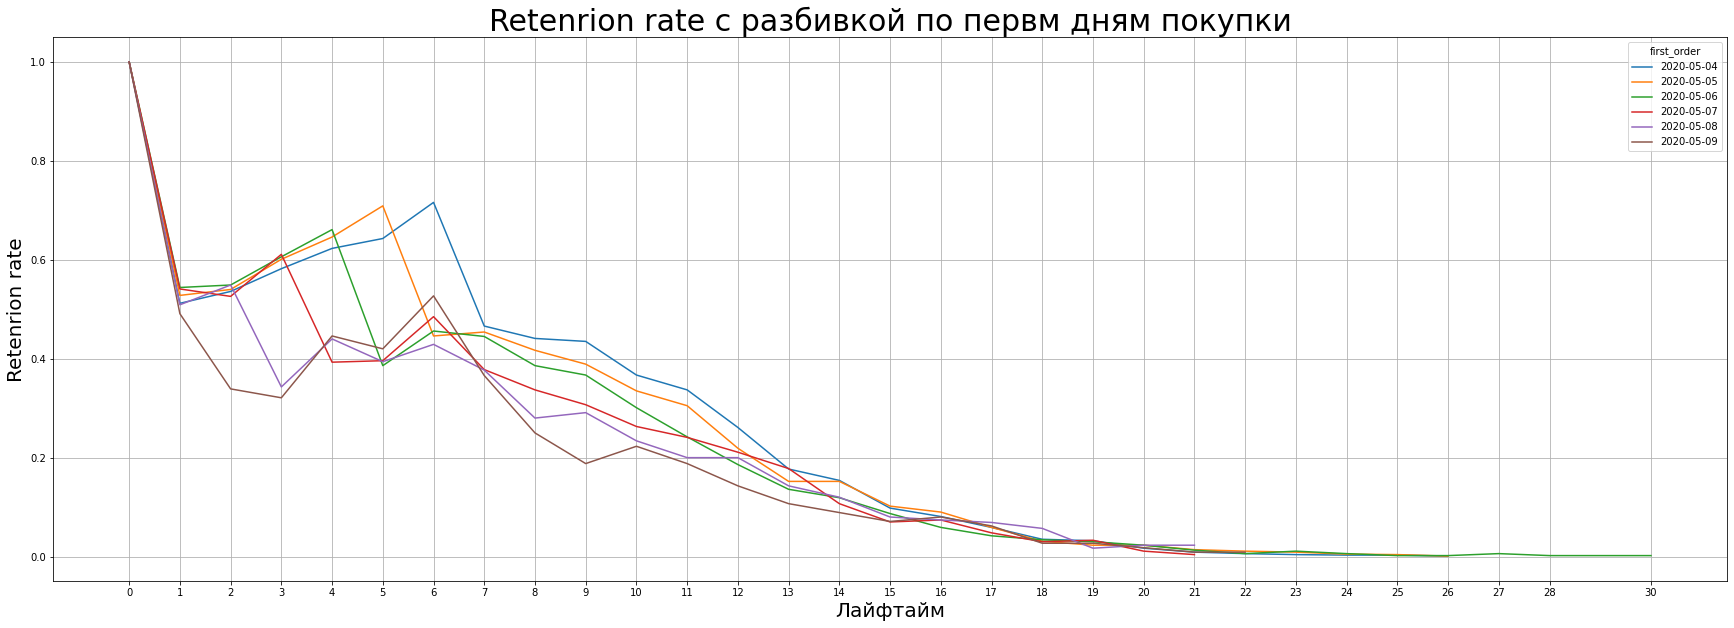

yandex_direct


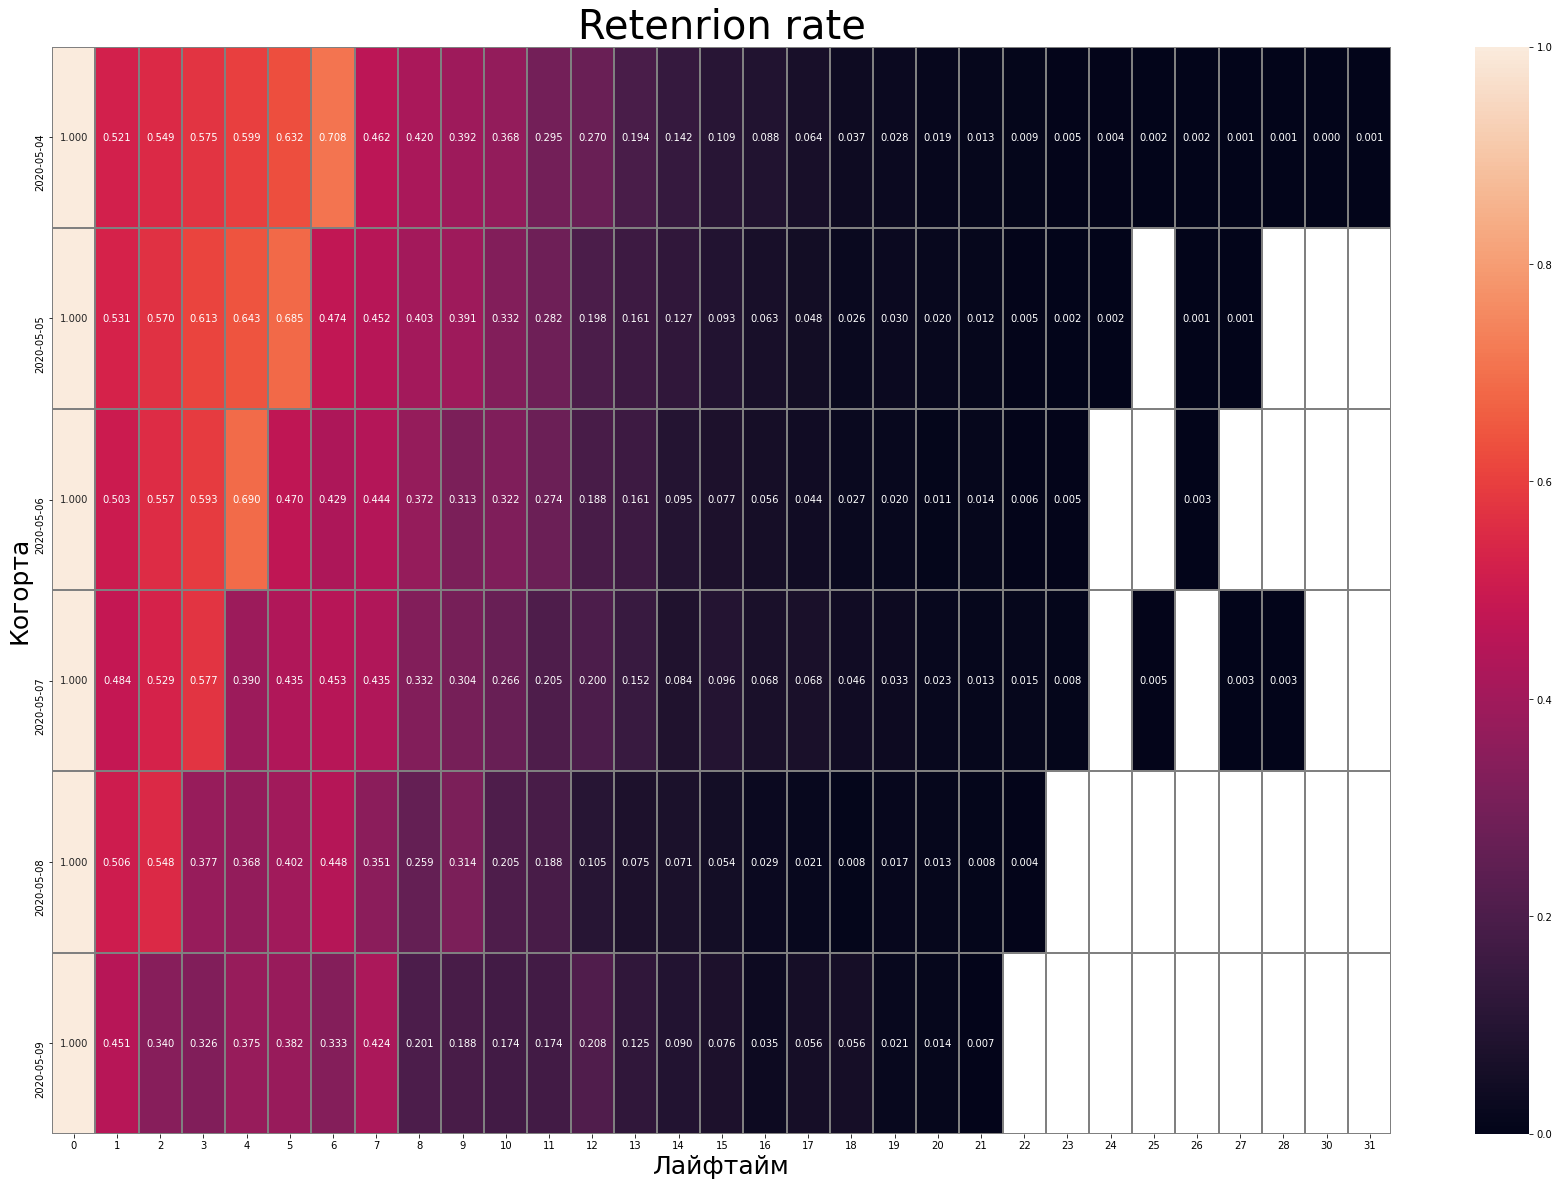

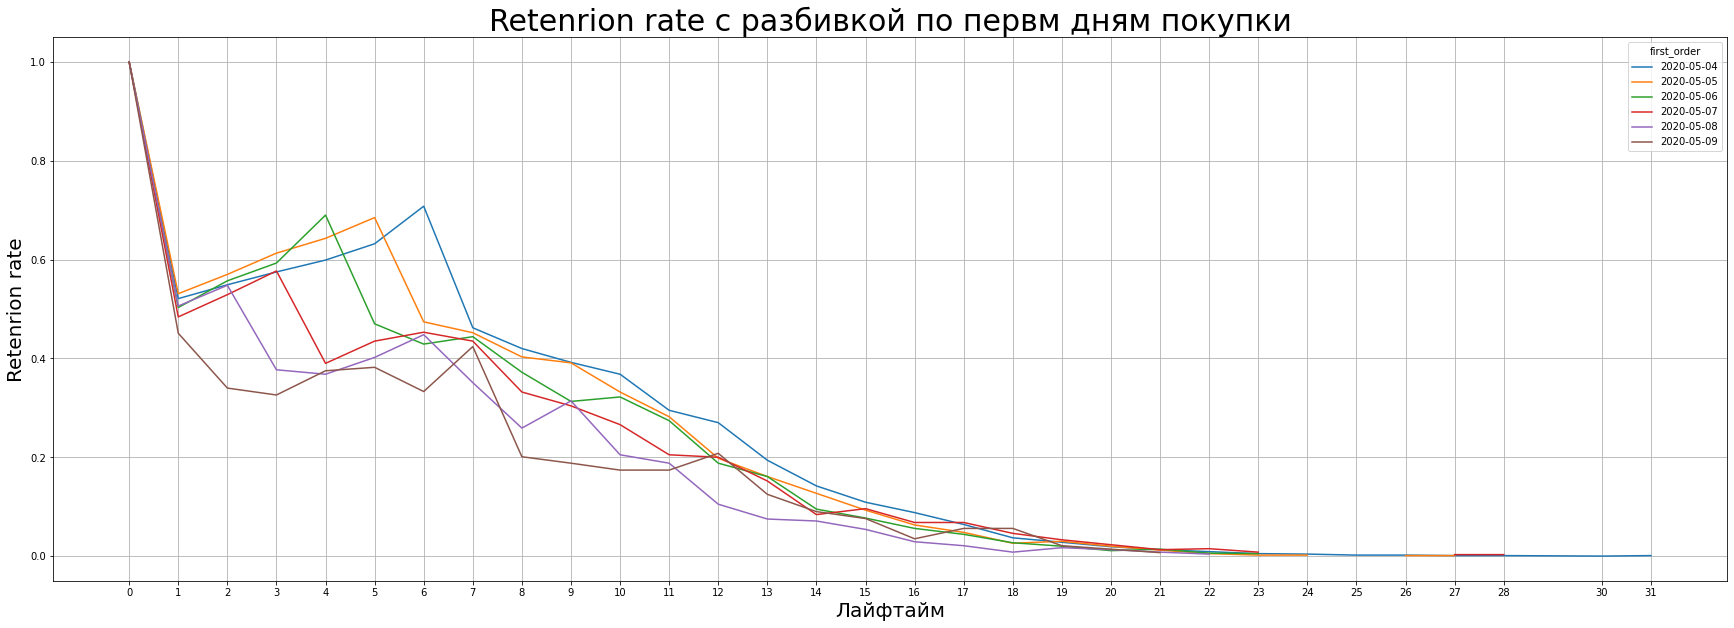

youtube_channel_reklama


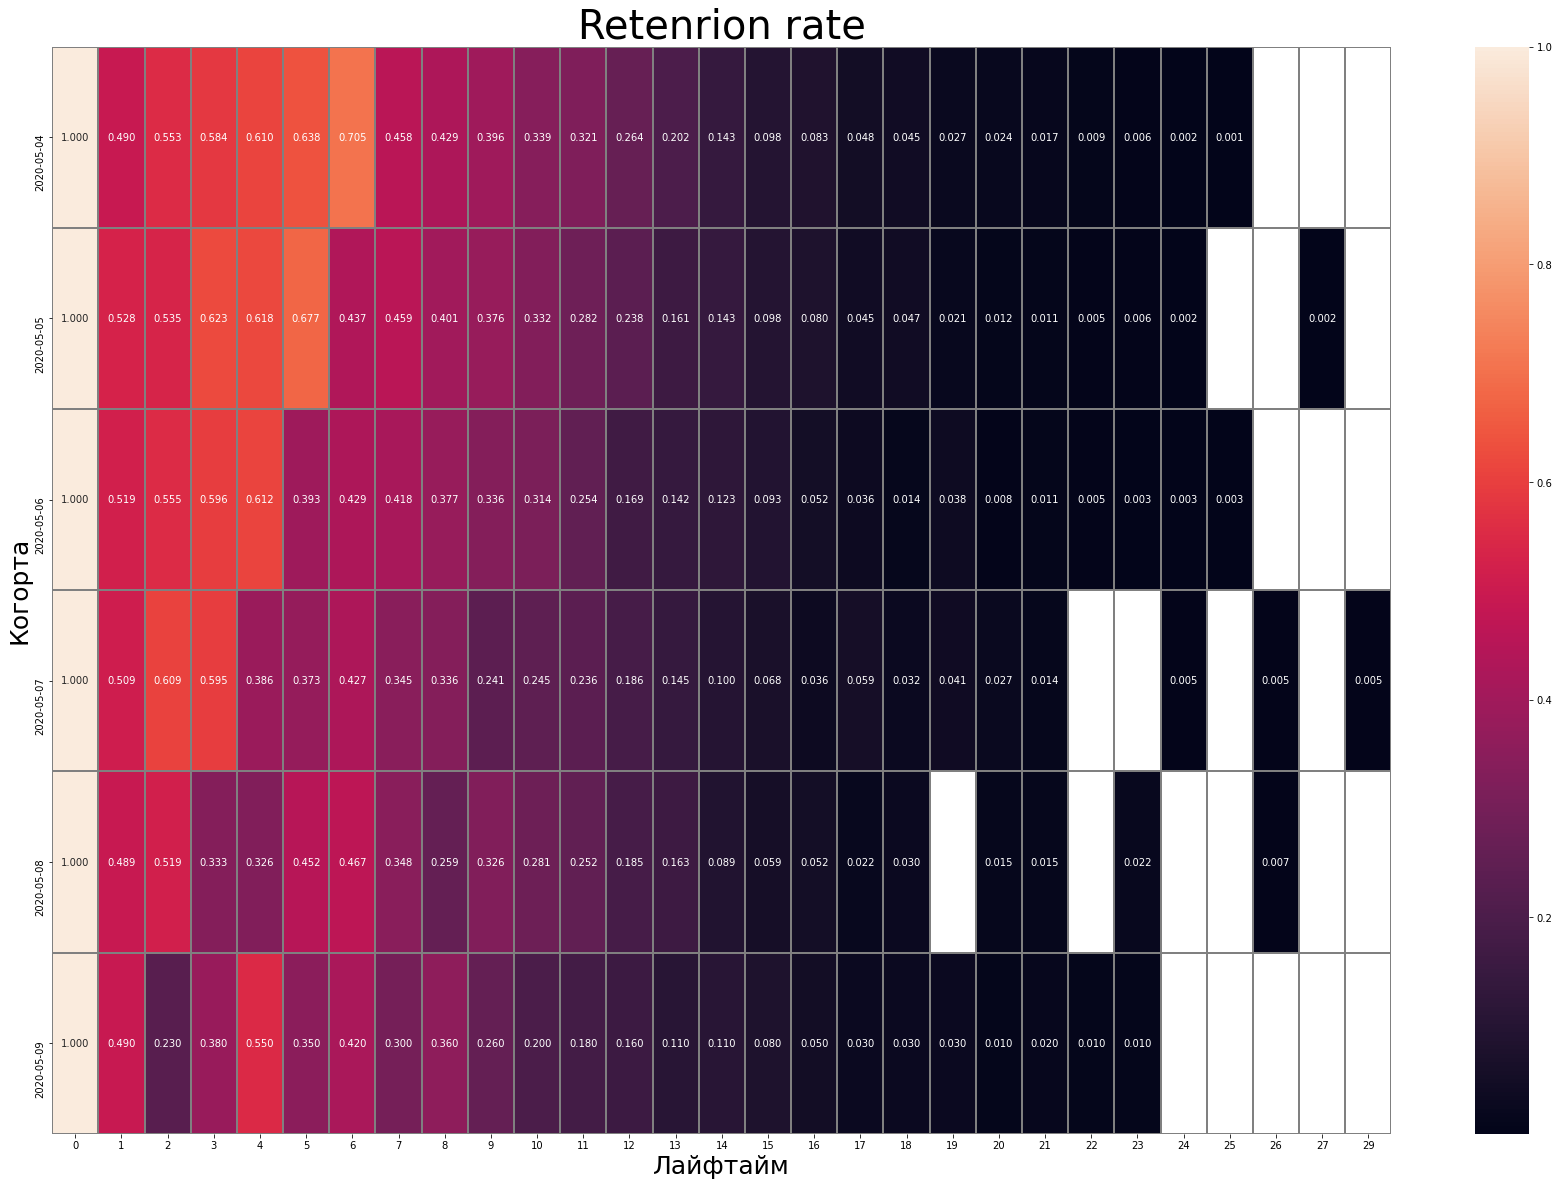

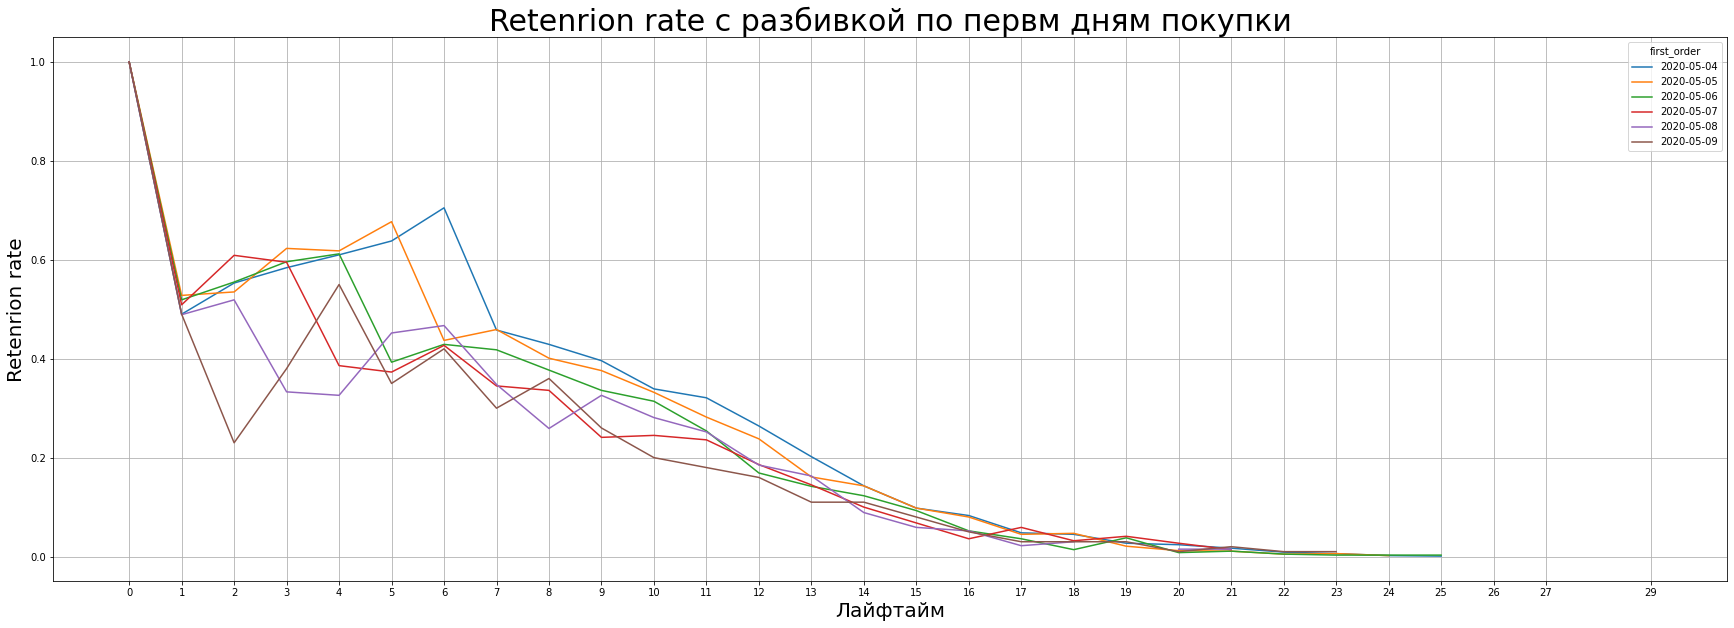

In [70]:
for source in list(retention_table['source'].unique()):
    retention_rate(retention_table[retention_table['source'] == source], source)

##### Промежуточные выводы

Как мы можем увидеть на графиках и хитмепах retention rate в первые дни высокие в отличии от последних дней, внезависимости от когорт и и ресурсов с которых пришли пользователи. Скорее всего это связано с тем, что пользователи быстро проходят первый уровень (только первый уровень есть в игре на данный момент) после чего у них есть выбор: перестать играть или пройти уровень еще раз. И так как большинству пользователей неинтересно перепроходит уровень, они покидают игру. Поэтому retention rate в последние дни очень низкий, в некоторые дни были и вовсе пропуски.

Отдельно хочу заметить ресурс Ютуб и конкретно когорту 20-20-05-09, на второй день жизни  этой когорты, в отличии от всех остальных наблюдается очень сильное падение до 0,230 (предыдущий день 0,490), а на третий и четвертый день значительный скачек вверх 0,380 и 0,550. Скорее всего это какой-то выброс, но я счел должным это отметить.

#### Retention rate в разбиве по группам на тактики

In [71]:
retention_first_type = game_source.groupby(['game_type', 'user_id']).agg({'order_day':'min'}).reset_index()
retention_first_type = retention_first_type.rename(columns={'order_day' : 'first_order'})

In [72]:
game_type = game.drop(['event', 'building_type', 'project_type', 'game_type', 'finish_or_not', 'revenue'], axis=1)

retention_rate_tips = retention_first_type.merge(game_type, on='user_id')

retention_rate_tips['event_datetime'] = pd.to_datetime(retention_rate_tips['event_datetime']).dt.date
retention_rate_tips = retention_rate_tips.groupby(['game_type', 'first_order', 'event_datetime']).agg({'user_id':'nunique'})
retention_rate_tips = retention_rate_tips.sort_values(by=['game_type', 'first_order', 'event_datetime']).reset_index()
retention_rate_tips = retention_rate_tips.rename(columns={'user_id':'days_user'})

In [73]:
retention_all_type = retention_first_type.groupby(by=['game_type', 'first_order']).agg({'user_id':'nunique'}) 

In [74]:
retention_table_type = retention_rate_tips.merge(retention_all_type, on=['game_type', 'first_order'])
retention_table_type['retention_rate'] = retention_table_type['days_user'] / retention_table_type['user_id'] 
retention_table_type['age'] = (retention_table_type['event_datetime'] - retention_table_type['first_order']) / timedelta(days=1)
retention_table_type['age'] = retention_table_type['age'].astype('int')
retention_table_type

game_type first_order event_datetime  days_user  user_id  retention_rate  \
0         PVE  2020-05-04     2020-05-04        921      921        1.000000   
1         PVE  2020-05-04     2020-05-05        539      921        0.585233   
2         PVE  2020-05-04     2020-05-06        570      921        0.618893   
3         PVE  2020-05-04     2020-05-07        614      921        0.666667   
4         PVE  2020-05-04     2020-05-08        625      921        0.678610   
..        ...         ...            ...        ...      ...             ...   
375       PVP  2020-05-10     2020-05-27          9      259        0.034749   
376       PVP  2020-05-10     2020-05-28          6      259        0.023166   
377       PVP  2020-05-10     2020-05-29          6      259        0.023166   
378       PVP  2020-05-10     2020-05-30          2      259        0.007722   
379       PVP  2020-05-10     2020-05-31          1      259        0.003861   

     age  
0      0  
1      1  
2      2  
3      3  
4      4  
..   ...  
375   17  
376   18  
377   19  
378   20  
379   21  

[380 rows x 7 columns]

In [75]:
def retention_rate_type(data, types):
    retention_rate_type = data.pivot_table(index='first_order', columns='age', values='retention_rate', aggfunc='mean').round(3)

    print(types)
    plt.figure(figsize=(30, 20))
    plt.title('Retenrion rate', size=40)
    ax = sns.heatmap(retention_rate_type, annot=True, fmt='.3f', linewidths=1, linecolor='grey')
    plt.xlabel('Лайфтайм', size=25)
    plt.ylabel('Когорта', size=25)
    plt.show()
    
    retention_rate_type.T.plot(grid=True, figsize=(30, 10), xticks=list(retention_rate_type.columns.values))
    plt.title('Retenrion rate с разбивкой по первм дням покупки', size=30)
    plt.ylabel('Retenrion rate', size=20)
    plt.xlabel('Лайфтайм', size=20)
    plt.show()

PVE


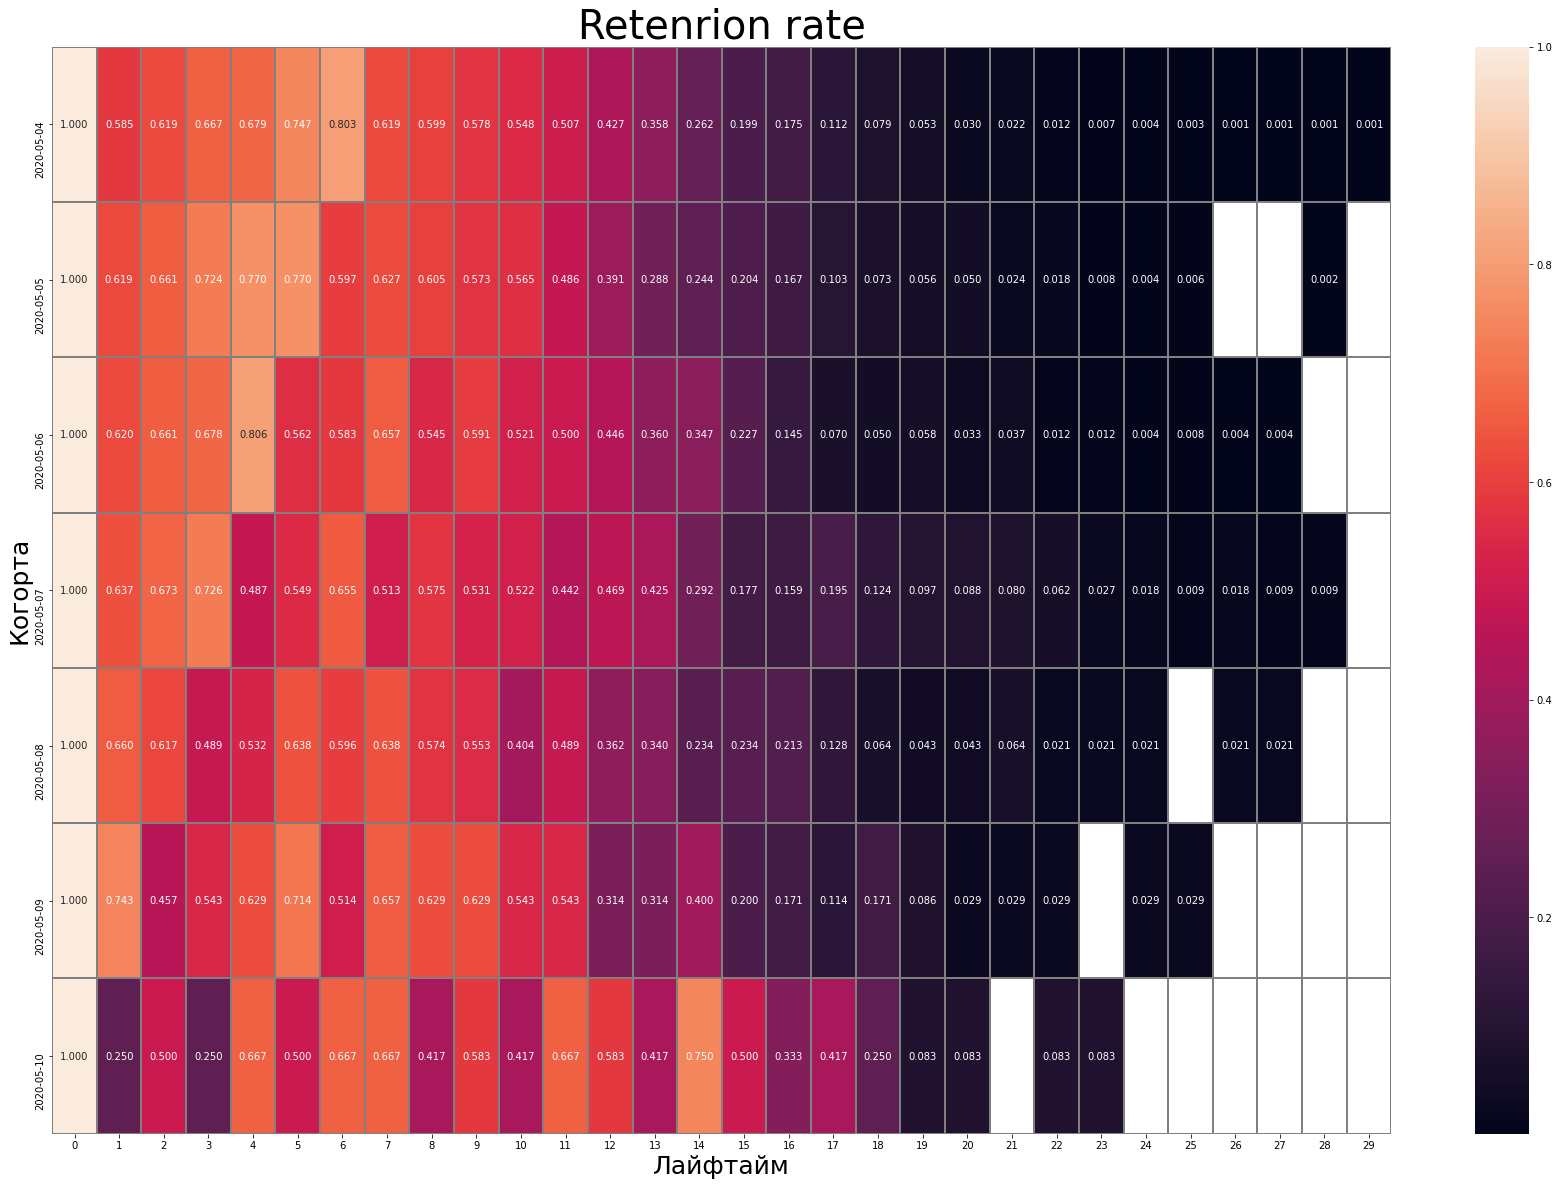

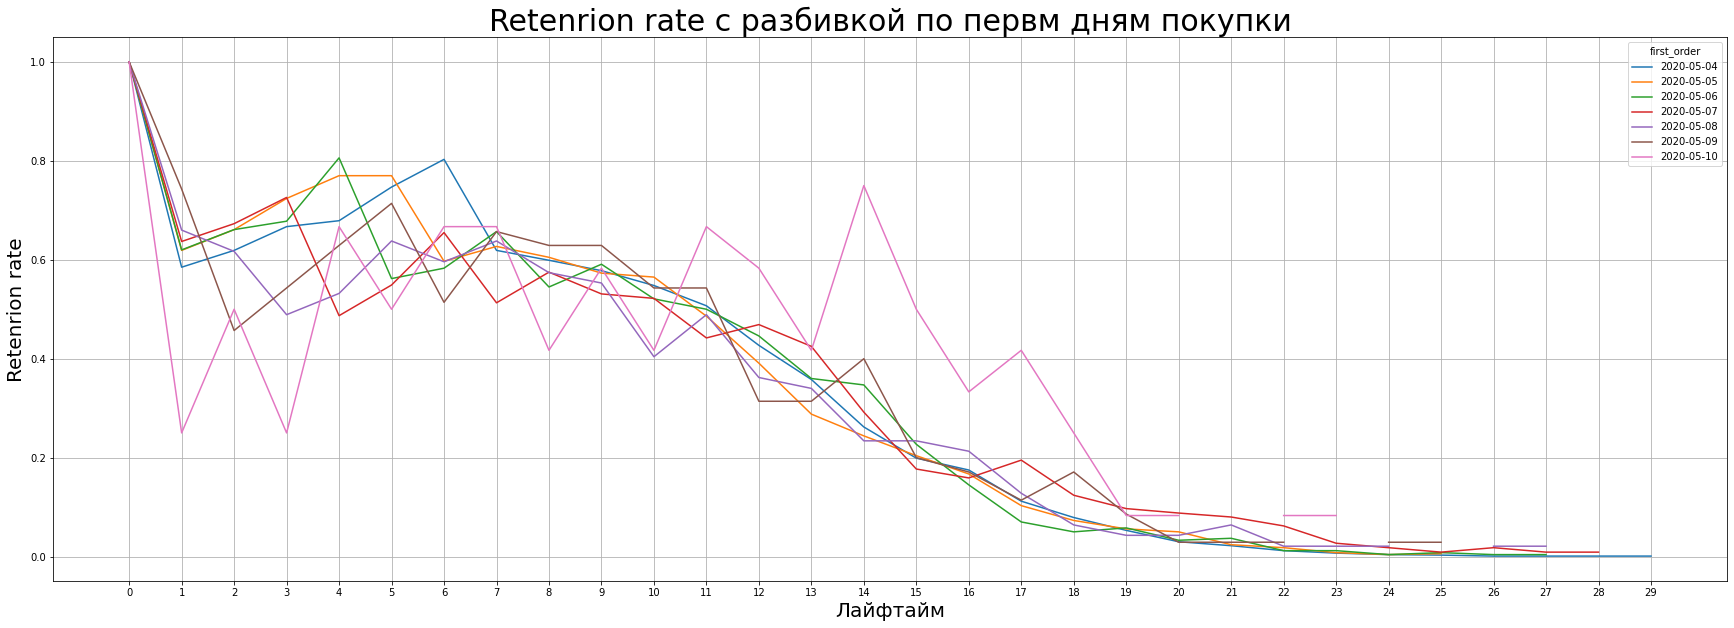

PVP


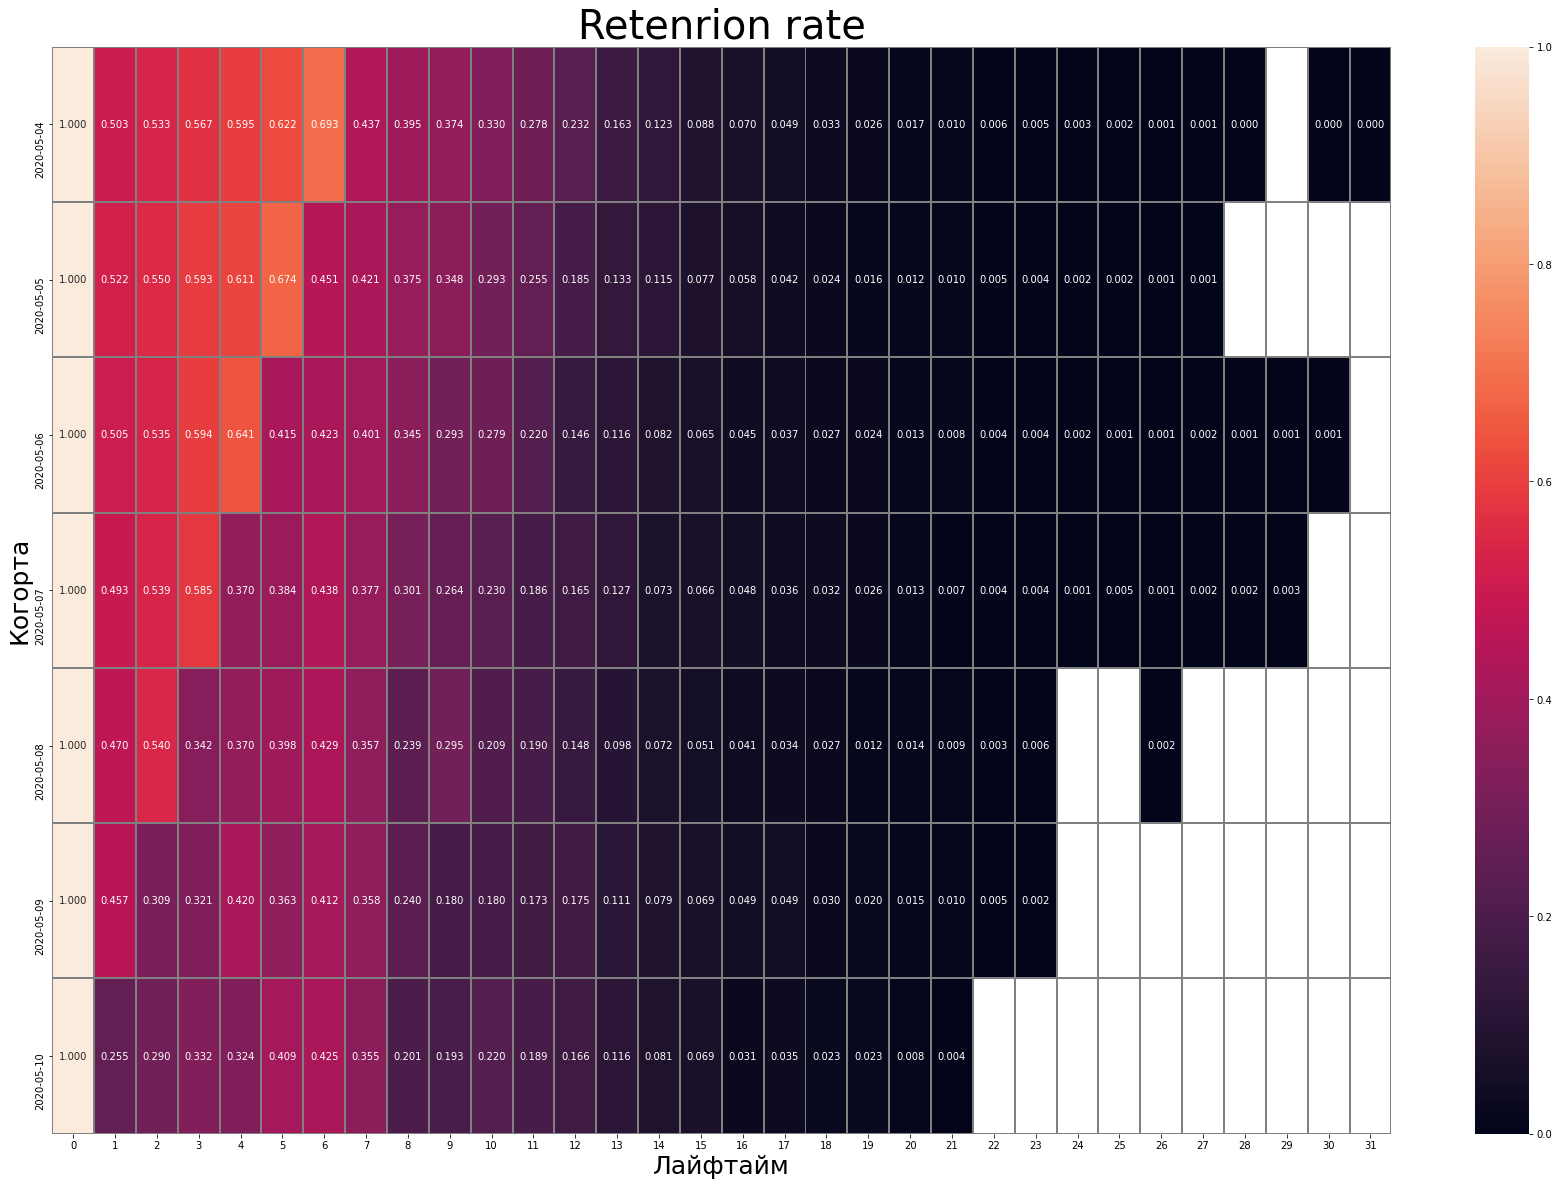

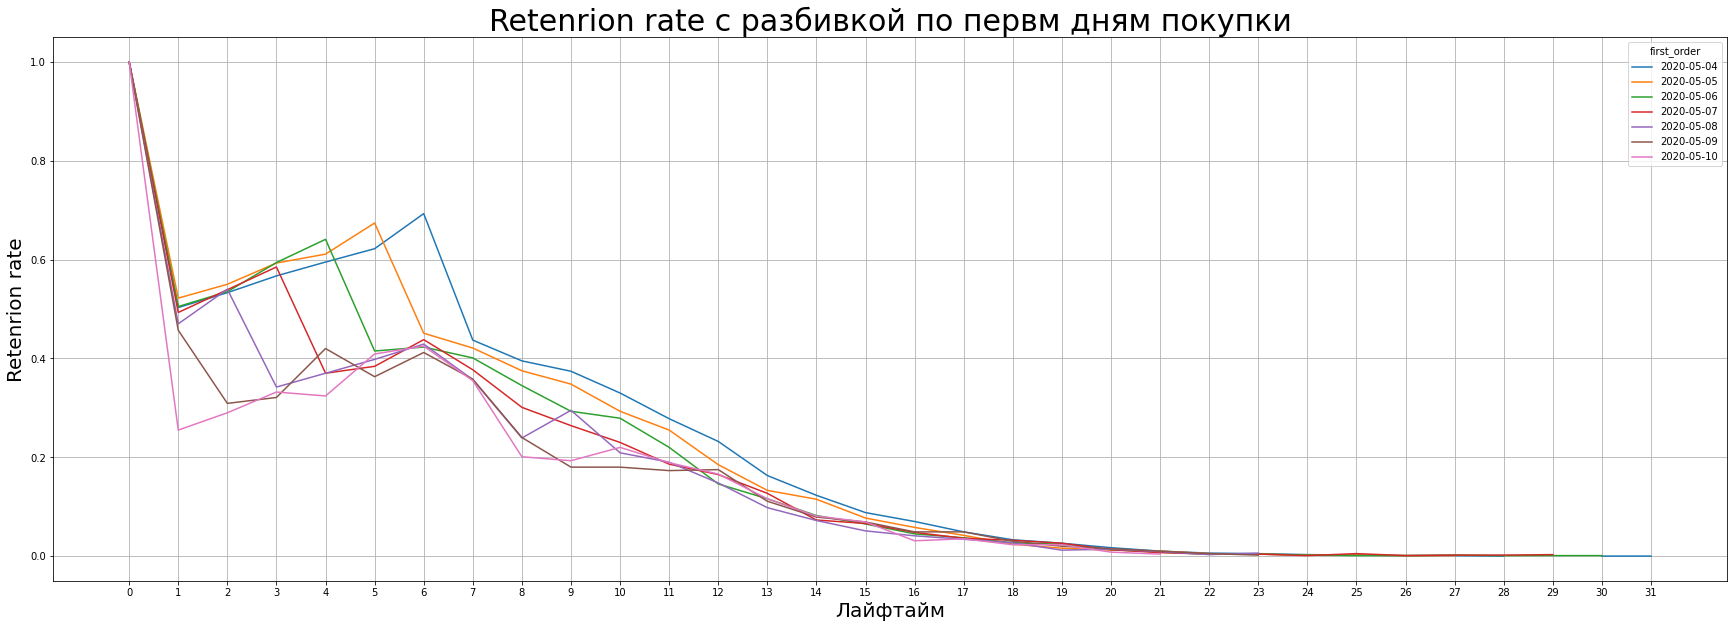

In [76]:
for types in list(retention_table_type['game_type'].unique()):
    retention_rate_type(retention_table_type[retention_table_type['game_type'] == types], types)

##### Промежуточный вывод

#### Конверсия пользователей завершивших первый уровень

In [77]:
CR = (game['user_id'].loc[game['finish_or_not'] == 'finish'].nunique() / game['user_id'].nunique())*100
CR = round(CR,2)
print(f'Конверсия пользователей завершивших игру составила {CR}%')

Конверсия пользователей завершивших игру составила 42.85%


##### Промежуточные выводы

#### Конверсия пользователей завершивших первый уровень в разбивке по тактике игры

In [78]:
PVP = (game['user_id'].loc[game['game_type'] == 'PVP'].nunique() / game['user_id'].nunique()) * 100
PVP = round(PVP, 2)
PVE = (game['user_id'].loc[game['game_type'] == 'PVE'].nunique() / game['user_id'].nunique()) * 100
PVE = round(PVE, 2)
PVP_finish = (game['user_id'].loc[(game['game_type'] == 'PVP')&(game['finish_or_not'] == 'finish')].nunique() / game['user_id'].loc[game['finish_or_not'] == 'finish'].nunique()) * 100
PVP_finish = round(PVP_finish, 2)
PVE_finish = (game['user_id'].loc[(game['game_type'] == 'PVE')&(game['finish_or_not'] == 'finish')].nunique() / game['user_id'].loc[game['finish_or_not'] == 'finish'].nunique()) * 100
PVE_finish = round(PVE_finish, 2)
print(f'Процент игроков, выбравших тактику PVP: {PVP}%')
print(f'Процент игроков, выбравших тактику PVE: {PVE}%')
print(f'Процент игроков, выбравших тактику PVP и прошедших первый уровень: {PVP_finish}%')
print(f'Процент игроков, выбравших тактику PVE и прошедших первый уровень: {PVE_finish}%')

Процент игроков, выбравших тактику PVP: 86.26%
Процент игроков, выбравших тактику PVE: 13.74%
Процент игроков, выбравших тактику PVP и прошедших первый уровень: 67.92%
Процент игроков, выбравших тактику PVE и прошедших первый уровень: 32.08%


In [79]:
CR_PVP = (game['user_id'].loc[(game['finish_or_not'] == 'finish')&(game['game_type'] == 'PVP')].nunique() / game['user_id'].loc[game['game_type'] == 'PVP'].nunique())*100
CR_PVP = round(CR_PVP,2)
print(f'Конверсия пользователей завершивших игру через тактику PVP составила {CR_PVP}%')

Конверсия пользователей завершивших игру через тактику PVP составила 33.74%


In [80]:
CR_PVE = (game['user_id'].loc[(game['finish_or_not'] == 'finish')&(game['game_type'] == 'PVE')].nunique() / game['user_id'].loc[game['game_type'] == 'PVE'].nunique())*100
CR_PVE = round(CR_PVE,2)
print(f'Конверсия пользователей завершивших игру через тактику PVE составила {CR_PVE}%')

Конверсия пользователей завершивших игру через тактику PVE составила 100.0%


##### Промежуточные выводы

#### Построить график по каналам отношения суммарного количества пользователей и суммарных затрат, построить гистограмму

CAC

- Построить график по каналам отношения суммарного количества пользователей и суммарных затрат, построить гистограмму
- Построить гистограмму отношения CAC по каналам и количества построек по каналам на игрока (это и есть ранжировка цена/качество)

#### Построить гистограмму отношения CAC по каналам и количества построек по каналам на игрока (это и есть ранжировка цена/качество)

In [81]:
mean_roi_source = cohort_all.pivot_table(index = 'source', values='roi', aggfunc='mean').reset_index()\
.sort_values(by='roi', ascending=False)
fig = px.bar(mean_roi_source, x='source', y='roi')
fig.update_layout(title='Ранжировка ресурсов по средней окупаемости инвистиций',\
                  xaxis_title='ресурсы', yaxis_title='ROI')
fig.update_xaxes(tickangle=45)
fig.show()

In [82]:
median_roi_source = cohort_all.pivot_table(index = 'source', values='roi', aggfunc='median').reset_index()\
.sort_values(by='roi', ascending=False)
fig = px.bar(median_roi_source, x='source', y='roi')
fig.update_layout(title='Ранжировка ресурсов по медианной окупаемости инвистиций',\
                  xaxis_title='ресурсы', yaxis_title='ROI')
fig.update_xaxes(tickangle=45)
fig.show()

In [83]:
min_roi_source = cohort_all.pivot_table(index = 'source', values='roi', aggfunc='min').reset_index()\
.sort_values(by='roi', ascending=False)
fig = px.bar(min_roi_source, x='source', y='roi')
fig.update_layout(title='Ранжировка ресурсов по минимальной окупаемости инвистиций',\
                  xaxis_title='ресурсы', yaxis_title='ROI')
fig.update_xaxes(tickangle=45)
fig.show()

In [84]:
max_roi_source = cohort_all.pivot_table(index = 'source', values='roi', aggfunc='max').reset_index()\
.sort_values(by='roi', ascending=False)
fig = px.bar(max_roi_source, x='source', y='roi')
fig.update_layout(title='Ранжировка ресурсов по максимальной окупаемости инвистиций',\
                  xaxis_title='ресурсы', yaxis_title='ROI')
fig.update_xaxes(tickangle=45)
fig.show()

##### Промежуточные выводы

#### Проверка гипотезы: время завершения уровня различается в зависимости способа прохождения

Гипотеза 1:
 - Рабочая гипотеза: время завершения уровня различается в зависимости способа прохождения
 - В качестве стат. теста выбираем t-тест, сравнивать будем среднее время прохождения уровня разными способами
 - Н0: Среднее время завершения уровня через реализацию проекта и через победу над первым игроком равны, следовательно зависимости нет
 - Н1: Среднее время завершения уровня через реализацию проекта и через победу над первым игроком не равны, следовательно зависимости есть 
 - после проведения стат. теста, который скажет отвергаем или принимаем мы нулевую гипотезу, в случае отвержения нулевой гипотезы, мы выведем оба значения среднего времени и посчитаем их разницу, таким образом покажем какой способ быстрее и насколько отличается.
 - На основе вывода о среднем времени делаем вывод о различиях времени завершения в зависимости от способа прохождения


In [85]:
finish_user = game.query('finish_or_not == "finish"')

In [86]:
filter_PVP = finish_user.query('game_type == "PVP"')
filter_PVE = finish_user.query('game_type == "PVE"')

In [87]:
PVP_time = filter_PVP.groupby('user_id').agg({'event_datetime':['min', 'max']})
PVP_time.columns = PVP_time.columns.droplevel(0)
PVP_time = PVP_time.reset_index()

PVP_time['time'] = PVP_time['max'] - PVP_time['min']
PVP_time = PVP_time.sort_values(by='time', ascending=False)

PVP_time['time'] = PVP_time['time'] / np.timedelta64(1, 'h')

PVP_time = PVP_time.drop(['min', 'max', 'user_id'], axis=1)

In [88]:
PVE_time = filter_PVE.groupby('user_id').agg({'event_datetime':['min', 'max']})
PVE_time.columns = PVE_time.columns.droplevel(0)
PVE_time = PVE_time.reset_index()

PVE_time['time'] = PVE_time['max'] - PVE_time['min']
PVE_time = PVE_time.sort_values(by='time', ascending=False)

PVE_time['time'] = PVE_time['time'] / np.timedelta64(1, 'h')

PVE_time = PVE_time.drop(['min', 'max', 'user_id'], axis=1)

In [89]:
alpha = .05

results = st.ttest_ind (a=PVE_time, b=PVP_time) 

print('p-значение:', results.pvalue)
mean_pve = PVE_time['time'].mean().round(2)
mean_pvp = PVP_time['time'].mean().round(2)

if (results.pvalue != alpha):
    print("Отвергаем нулевую гипотезу")

else:
    mean_pve = PVE_time['time'].mean().round(2)
    mean_pvp = PVP_time['time'].mean().round(2)
    print("Не получилось отвергунть нулевую гипотезу")
    print(f'Средняя продолжительность игры через тактику PVE: {mean_pve}')
    print(f'Средняя продолжительность игры через тактику PVP: {mean_pvp}')
    print(f'Разница продолжительности игры: {(mean_pve -  mean_pvp)}')

p-значение: [7.25684533e-98]
Отвергаем нулевую гипотезу


##### Промежуточные выводы

Зависимость длительности прохождения уровня от тактики игры (PVP или PVE) есть

#### Проверка гипотезы: есть ли зависимость вероятности прохождения уровня от канала

- Гипотеза 2:
    - Рабочая гипотеза: Есть ли зависимость вероятности прохождения уровня от канала
    - В качестве стат. теста выбираем z-тест, сравнивать будем доли игроков завершивших первый уровень по каналам
    - Н0:  Доля игроков завершивших уровень первого канала равна доли игроков второго канала, следовательно зависимости нет
    - Н1: Доля игроков завершивших уровень первого канала не равна доли игроков второго канала, следовательно зависимость есть
    - На основе вывода о долях делам вывод о наличии зависимости

In [90]:
user_finish_df = game_source[(game_source['finish_or_not'] == 'finish')]
user_not_finish_df = game_source[game_source['finish_or_not'] == 'not_finish']

In [91]:
user_finish_df = user_finish_df.drop_duplicates(subset=['user_id'])
user_not_finish_df = user_not_finish_df.drop_duplicates(subset=['user_id'])

In [92]:
user_finish_df['id_finish'] = 1
user_not_finish_df['id_finish'] = 0

In [93]:
df = pd.concat([user_finish_df, user_not_finish_df]).reset_index()

In [94]:
instagram_new_adverts = df[df['source'] == 'instagram_new_adverts']['id_finish']
facebook_ads = df[df['source'] == 'facebook_ads']['id_finish']
youtube_channel_reklama = df[df['source'] == 'youtube_channel_reklama']['id_finish']
yandex_direct = df[df['source'] == 'yandex_direct']['id_finish']

In [95]:
alpha_2 = .05 / 6

In [96]:
def z_test(source_one, source_two, title):

    print(title)
    
    z_stat, p_value = ztest(source_one, source_two) 

    print('p-значение: ', p_value)
        
    if results.pvalue != alpha_2:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    
    print('\n')

In [97]:
z_test(instagram_new_adverts, facebook_ads, 'Первый канал: Инстаграм \n\
Второй канал: Фейсбук')
z_test(instagram_new_adverts, youtube_channel_reklama, 'Первый канал: Инстаграм \n\
Второй канал: Ютуб')
z_test(instagram_new_adverts, yandex_direct, 'Первый канал: Инстаграм \n\
Второй канал: Яндекс')
z_test(facebook_ads, youtube_channel_reklama, 'Первый канал: Фейсбук \n\
Второй канал: Ютуб')
z_test(facebook_ads, yandex_direct, 'Первый канал: Фейсбук \n\
Второй канал: Яндекс')
z_test(youtube_channel_reklama, yandex_direct, 'Первый канал: Ютуб \n\
Второй канал: Яндекс')

Первый канал: Инстаграм 
Второй канал: Фейсбук
p-значение:  0.20645646226642445
Отвергаем нулевую гипотезу


Первый канал: Инстаграм 
Второй канал: Ютуб
p-значение:  0.612417866589146
Отвергаем нулевую гипотезу


Первый канал: Инстаграм 
Второй канал: Яндекс
p-значение:  0.20596866905950995
Отвергаем нулевую гипотезу


Первый канал: Фейсбук 
Второй канал: Ютуб
p-значение:  0.47380204947523163
Отвергаем нулевую гипотезу


Первый канал: Фейсбук 
Второй канал: Яндекс
p-значение:  0.862456588043136
Отвергаем нулевую гипотезу


Первый канал: Ютуб 
Второй канал: Яндекс
p-значение:  0.5244671049453407
Отвергаем нулевую гипотезу




##### Промежуточные выводы

Зависимость завершения уровня от канала с которого пришел пользователь есть

### Ответы на вопросы заказчика

 - Написать как выглядит показатели LTV, CAC и ROI
 - LTV
     - В общем анализе LTV видно, что 2020-05-10 был скачек в положительную сторону у всех каналов и во всех когортах, самый значительный скачок был 2020-05-04, 2020-05-05, 2020-05-06, 2020-05-07 и 2020-05-08. Также на хитмепе мы можем видеть, что в какие-то дни игроки просто не играли, возможно они утратили интерес или прошли уровень, после чего перестали играть. В первые 6 дней лайфтайма в каждой когорте мы наблюдаем значительный прирост LTV на хитмепе. В последние дни лайфтайма когорты LTV прибавляется на 0,01-0,02. Следует проанализировать LTV по ресурсам.
     - При детальном рассмотрении LTV по ресурсам и когортам можно сказать, что во всех когортах возможны пропуски припроста LTV, скорее всего это связано с тем, что игроки утратили интерес к игре после прохождения первого уровня. Каких-то отличительных особенностей друг от друга и от общего анализа LTV не было найдено.
 - CAC    
     - Ресурс с самым большим показателем САС - Фейсбук - 0,785365
     - Ресурс с самым низким показателем САС - Ютуб - 0,397662
     - Считаю немобходимым отметить ресурс Яндекс, так как он имеет самые больших расходы на рекламу и самое большое количество привлеченных пользователей, при этом его CAC - 0,463590, то есть этот канал очень качественный.
     
 - ROI
     - Как мы видим, все хитмепы и все графики между собой схожи. По всем этим графикам можно сделать вывод, что при условно взятой 1 за каждый просмотр рекламе при строительстве, окупаемость вложенных средств в рекламу достаточно высокая в первые дни жизни, и затем в 13-16 день возврат на инвестиции становится ниже окупаемостию То есть самые прибыльное время это первые две недели после первого захода пользователя в игру. Предположу, что после истечения двух недель игрок проходит первый уровень, а так как в игре он всего один, он просто теряет интерес и покиидает игру, из-за этого падает показатель ROI.
 
 - Написать как каналы ранжируются по суммарным расходам и средним расходам на пользователя
 
 
 - Написать пользователи с какого канала чаще проходят 1 уровень, дольше играют и больше строят.

### Выводы